# Computer Vision Homework 3: Big vs Small Models

## Brief

Due date: Nov 13, 2023

Required files: `homework-3.ipynb`, `report.pdf`

To download the jupyter notebook from colab, you can refer to the colab tutorial we gave.


## Codes for Problem 1 and Problem 2

### Import Packages

In [1]:
import glob
import os
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim

from PIL import Image
from torch.utils.data import DataLoader, Dataset, RandomSampler
from torchvision import transforms, models, datasets
from tqdm import tqdm

%matplotlib inline

### Check GPU Environment

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using {device} device')

Using cuda device


In [3]:
! nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-b1aaaa79-2d23-5e87-d608-29ac0a8504e6)


### Set the Seed to Reproduce the Result

In [4]:
def set_all_seed(seed):
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
set_all_seed(123)

### Create Dataset and Dataloader

In [5]:
batch_size = 256

mean = (0.4914, 0.4822, 0.4465)
std = (0.2471, 0.2435, 0.2616)
train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
])
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
])

train_dataset = datasets.CIFAR10(root='data', train=True, download=True, transform=train_transform)
valid_dataset = datasets.CIFAR10(root='data', train=False, download=True, transform=test_transform)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, pin_memory=True)

sixteenth_train_sampler = RandomSampler(train_dataset, num_samples=len(train_dataset)//16)
half_train_sampler = RandomSampler(train_dataset, num_samples=len(train_dataset)//2)

sixteenth_train_dataloader = DataLoader(train_dataset, batch_size=batch_size, sampler=sixteenth_train_sampler)
half_train_dataloader = DataLoader(train_dataset, batch_size=batch_size, sampler=half_train_sampler)

100%|██████████| 170498071/170498071 [00:03<00:00, 48118024.23it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


### Load Models

In [6]:
# HINT: Remember to change the model to 'resnet50' and the weights to weights="IMAGENET1K_V1" when needed.
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', weights=None)

# Background: The original resnet18 is designed for ImageNet dataset to predict 1000 classes.
# TODO: Change the output of the model to 10 class.
model.fc=nn.Linear(in_features=512,out_features=10,bias=True)
model=model.to(device)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip


### Training and Testing Models

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
100%|██████████| 40/40 [00:03<00:00, 11.15it/s]


Epoch  1: Loss = 1.9154 Acc = 0.06 Test_Loss = 1.8313 Test_Acc = 0.36


100%|██████████| 40/40 [00:02<00:00, 13.47it/s]


Epoch  2: Loss = 1.6117 Acc = 0.08 Test_Loss = 1.5407 Test_Acc = 0.44


100%|██████████| 40/40 [00:02<00:00, 14.05it/s]


Epoch  3: Loss = 1.5348 Acc = 0.09 Test_Loss = 1.4238 Test_Acc = 0.48


100%|██████████| 40/40 [00:02<00:00, 13.42it/s]


Epoch  4: Loss = 1.4800 Acc = 0.09 Test_Loss = 1.4356 Test_Acc = 0.46


100%|██████████| 40/40 [00:03<00:00, 11.28it/s]


Epoch  5: Loss = 1.4126 Acc = 0.10 Test_Loss = 1.3128 Test_Acc = 0.52


100%|██████████| 40/40 [00:02<00:00, 13.68it/s]


Epoch  6: Loss = 1.3225 Acc = 0.10 Test_Loss = 1.2717 Test_Acc = 0.54


100%|██████████| 40/40 [00:02<00:00, 13.75it/s]


Epoch  7: Loss = 1.3149 Acc = 0.11 Test_Loss = 1.2880 Test_Acc = 0.54


100%|██████████| 40/40 [00:02<00:00, 14.20it/s]


Epoch  8: Loss = 1.2729 Acc = 0.11 Test_Loss = 1.1998 Test_Acc = 0.57


100%|██████████| 40/40 [00:03<00:00, 11.21it/s]


Epoch  9: Loss = 1.2352 Acc = 0.11 Test_Loss = 1.1645 Test_Acc = 0.58


100%|██████████| 40/40 [00:02<00:00, 13.69it/s]


Epoch 10: Loss = 1.1696 Acc = 0.12 Test_Loss = 1.1764 Test_Acc = 0.59


100%|██████████| 40/40 [00:03<00:00, 13.32it/s]


Epoch 11: Loss = 1.1480 Acc = 0.12 Test_Loss = 1.1328 Test_Acc = 0.60


100%|██████████| 40/40 [00:02<00:00, 13.44it/s]


Epoch 12: Loss = 1.1461 Acc = 0.12 Test_Loss = 1.2338 Test_Acc = 0.58


100%|██████████| 40/40 [00:03<00:00, 10.90it/s]


Epoch 13: Loss = 1.0932 Acc = 0.12 Test_Loss = 1.1454 Test_Acc = 0.60


100%|██████████| 40/40 [00:02<00:00, 13.72it/s]


Epoch 14: Loss = 1.0702 Acc = 0.12 Test_Loss = 1.1932 Test_Acc = 0.60


100%|██████████| 40/40 [00:03<00:00, 12.80it/s]


Epoch 15: Loss = 1.0538 Acc = 0.12 Test_Loss = 1.0445 Test_Acc = 0.62


100%|██████████| 40/40 [00:02<00:00, 13.59it/s]


Epoch 16: Loss = 1.0387 Acc = 0.13 Test_Loss = 1.0688 Test_Acc = 0.63


100%|██████████| 40/40 [00:03<00:00, 11.04it/s]


Epoch 17: Loss = 1.0308 Acc = 0.13 Test_Loss = 1.0798 Test_Acc = 0.62


100%|██████████| 40/40 [00:02<00:00, 13.70it/s]


Epoch 18: Loss = 1.0220 Acc = 0.13 Test_Loss = 0.9741 Test_Acc = 0.66


100%|██████████| 40/40 [00:02<00:00, 13.99it/s]


Epoch 19: Loss = 0.9920 Acc = 0.13 Test_Loss = 1.0039 Test_Acc = 0.64


100%|██████████| 40/40 [00:03<00:00, 13.14it/s]


Epoch 20: Loss = 0.9570 Acc = 0.13 Test_Loss = 0.9254 Test_Acc = 0.69


100%|██████████| 40/40 [00:03<00:00, 11.33it/s]


Epoch 21: Loss = 0.9637 Acc = 0.13 Test_Loss = 1.0232 Test_Acc = 0.66


100%|██████████| 40/40 [00:02<00:00, 13.98it/s]


Epoch 22: Loss = 1.0007 Acc = 0.13 Test_Loss = 0.8878 Test_Acc = 0.69


100%|██████████| 40/40 [00:02<00:00, 13.88it/s]


Epoch 23: Loss = 0.9566 Acc = 0.13 Test_Loss = 1.0147 Test_Acc = 0.66


100%|██████████| 40/40 [00:03<00:00, 12.32it/s]


Epoch 24: Loss = 0.9575 Acc = 0.13 Test_Loss = 0.9869 Test_Acc = 0.67


100%|██████████| 40/40 [00:03<00:00, 12.38it/s]


Epoch 25: Loss = 0.9620 Acc = 0.13 Test_Loss = 0.9011 Test_Acc = 0.68


100%|██████████| 40/40 [00:02<00:00, 13.70it/s]


Epoch 26: Loss = 0.9160 Acc = 0.14 Test_Loss = 0.9763 Test_Acc = 0.67


100%|██████████| 40/40 [00:02<00:00, 13.97it/s]


Epoch 27: Loss = 0.9052 Acc = 0.14 Test_Loss = 0.9129 Test_Acc = 0.68


100%|██████████| 40/40 [00:03<00:00, 11.55it/s]


Epoch 28: Loss = 0.8949 Acc = 0.14 Test_Loss = 0.9294 Test_Acc = 0.68


100%|██████████| 40/40 [00:03<00:00, 13.07it/s]


Epoch 29: Loss = 0.8796 Acc = 0.14 Test_Loss = 0.8755 Test_Acc = 0.69


100%|██████████| 40/40 [00:02<00:00, 13.60it/s]


Epoch 30: Loss = 0.8387 Acc = 0.14 Test_Loss = 0.8299 Test_Acc = 0.71


100%|██████████| 40/40 [00:02<00:00, 13.63it/s]


Epoch 31: Loss = 0.8645 Acc = 0.14 Test_Loss = 0.8595 Test_Acc = 0.70


100%|██████████| 40/40 [00:03<00:00, 11.48it/s]


Epoch 32: Loss = 0.8537 Acc = 0.14 Test_Loss = 1.0309 Test_Acc = 0.66


100%|██████████| 40/40 [00:03<00:00, 12.38it/s]


Epoch 33: Loss = 0.9692 Acc = 0.13 Test_Loss = 0.8627 Test_Acc = 0.70


100%|██████████| 40/40 [00:02<00:00, 13.79it/s]


Epoch 34: Loss = 0.8696 Acc = 0.14 Test_Loss = 0.8504 Test_Acc = 0.70


100%|██████████| 40/40 [00:02<00:00, 13.77it/s]


Epoch 35: Loss = 0.8183 Acc = 0.14 Test_Loss = 0.8680 Test_Acc = 0.70


100%|██████████| 40/40 [00:03<00:00, 11.55it/s]


Epoch 36: Loss = 0.8248 Acc = 0.14 Test_Loss = 0.9345 Test_Acc = 0.68


100%|██████████| 40/40 [00:03<00:00, 12.96it/s]


Epoch 37: Loss = 0.8132 Acc = 0.14 Test_Loss = 0.7984 Test_Acc = 0.73


100%|██████████| 40/40 [00:02<00:00, 14.16it/s]


Epoch 38: Loss = 0.7755 Acc = 0.14 Test_Loss = 0.7922 Test_Acc = 0.72


100%|██████████| 40/40 [00:02<00:00, 13.40it/s]


Epoch 39: Loss = 0.7560 Acc = 0.15 Test_Loss = 0.8090 Test_Acc = 0.72


100%|██████████| 40/40 [00:03<00:00, 11.63it/s]


Epoch 40: Loss = 0.7929 Acc = 0.14 Test_Loss = 0.8815 Test_Acc = 0.69


100%|██████████| 40/40 [00:03<00:00, 12.53it/s]


Epoch 41: Loss = 0.8041 Acc = 0.14 Test_Loss = 0.7664 Test_Acc = 0.73


100%|██████████| 40/40 [00:02<00:00, 14.08it/s]


Epoch 42: Loss = 0.7581 Acc = 0.15 Test_Loss = 0.7733 Test_Acc = 0.73


100%|██████████| 40/40 [00:02<00:00, 14.03it/s]


Epoch 43: Loss = 0.7292 Acc = 0.15 Test_Loss = 0.8719 Test_Acc = 0.70


100%|██████████| 40/40 [00:03<00:00, 10.97it/s]


Epoch 44: Loss = 0.8568 Acc = 0.14 Test_Loss = 0.7542 Test_Acc = 0.74


100%|██████████| 40/40 [00:02<00:00, 13.81it/s]


Epoch 45: Loss = 0.7309 Acc = 0.15 Test_Loss = 0.7447 Test_Acc = 0.74


100%|██████████| 40/40 [00:02<00:00, 13.50it/s]


Epoch 46: Loss = 0.7351 Acc = 0.15 Test_Loss = 0.7157 Test_Acc = 0.75


100%|██████████| 40/40 [00:02<00:00, 13.47it/s]


Epoch 47: Loss = 0.7406 Acc = 0.15 Test_Loss = 0.7871 Test_Acc = 0.73


100%|██████████| 40/40 [00:03<00:00, 11.18it/s]


Epoch 48: Loss = 0.7265 Acc = 0.15 Test_Loss = 0.7441 Test_Acc = 0.74


100%|██████████| 40/40 [00:02<00:00, 13.44it/s]


Epoch 49: Loss = 0.7066 Acc = 0.15 Test_Loss = 0.7547 Test_Acc = 0.74


100%|██████████| 40/40 [00:02<00:00, 13.35it/s]
Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


Epoch 50: Loss = 0.7273 Acc = 0.15 Test_Loss = 0.7071 Test_Acc = 0.75


100%|██████████| 40/40 [00:02<00:00, 13.84it/s]


Epoch  1: Loss = 1.7838 Acc = 0.14 Test_Loss = 1.5799 Test_Acc = 0.42


100%|██████████| 40/40 [00:03<00:00, 11.24it/s]


Epoch  2: Loss = 1.4732 Acc = 0.18 Test_Loss = 1.4026 Test_Acc = 0.48


100%|██████████| 40/40 [00:03<00:00, 11.92it/s]


Epoch  3: Loss = 1.3367 Acc = 0.21 Test_Loss = 1.4249 Test_Acc = 0.50


100%|██████████| 40/40 [00:02<00:00, 13.39it/s]


Epoch  4: Loss = 1.2358 Acc = 0.22 Test_Loss = 1.2090 Test_Acc = 0.56


100%|██████████| 40/40 [00:02<00:00, 13.78it/s]


Epoch  5: Loss = 1.1522 Acc = 0.23 Test_Loss = 1.1292 Test_Acc = 0.60


100%|██████████| 40/40 [00:03<00:00, 13.04it/s]


Epoch  6: Loss = 1.1016 Acc = 0.24 Test_Loss = 1.1704 Test_Acc = 0.60


100%|██████████| 40/40 [00:03<00:00, 11.06it/s]


Epoch  7: Loss = 1.0428 Acc = 0.25 Test_Loss = 1.0352 Test_Acc = 0.64


100%|██████████| 40/40 [00:02<00:00, 13.67it/s]


Epoch  8: Loss = 1.0024 Acc = 0.26 Test_Loss = 0.9467 Test_Acc = 0.67


100%|██████████| 40/40 [00:02<00:00, 13.51it/s]


Epoch  9: Loss = 0.9589 Acc = 0.26 Test_Loss = 0.9903 Test_Acc = 0.65


100%|██████████| 40/40 [00:02<00:00, 13.38it/s]


Epoch 10: Loss = 0.9264 Acc = 0.27 Test_Loss = 0.9233 Test_Acc = 0.68


100%|██████████| 40/40 [00:03<00:00, 11.02it/s]


Epoch 11: Loss = 0.8917 Acc = 0.27 Test_Loss = 0.8888 Test_Acc = 0.69


100%|██████████| 40/40 [00:02<00:00, 13.35it/s]


Epoch 12: Loss = 0.8793 Acc = 0.28 Test_Loss = 0.8478 Test_Acc = 0.70


100%|██████████| 40/40 [00:02<00:00, 13.53it/s]


Epoch 13: Loss = 0.8394 Acc = 0.28 Test_Loss = 0.9224 Test_Acc = 0.68


100%|██████████| 40/40 [00:02<00:00, 13.51it/s]


Epoch 14: Loss = 0.8318 Acc = 0.28 Test_Loss = 0.8198 Test_Acc = 0.72


100%|██████████| 40/40 [00:03<00:00, 10.99it/s]


Epoch 15: Loss = 0.8075 Acc = 0.29 Test_Loss = 0.8705 Test_Acc = 0.69


100%|██████████| 40/40 [00:03<00:00, 12.28it/s]


Epoch 16: Loss = 0.7934 Acc = 0.29 Test_Loss = 0.7939 Test_Acc = 0.72


100%|██████████| 40/40 [00:02<00:00, 13.72it/s]


Epoch 17: Loss = 0.7737 Acc = 0.29 Test_Loss = 0.8096 Test_Acc = 0.72


100%|██████████| 40/40 [00:02<00:00, 13.45it/s]


Epoch 18: Loss = 0.7459 Acc = 0.29 Test_Loss = 0.7434 Test_Acc = 0.74


100%|██████████| 40/40 [00:03<00:00, 13.32it/s]


Epoch 19: Loss = 0.7343 Acc = 0.30 Test_Loss = 0.7767 Test_Acc = 0.73


100%|██████████| 40/40 [00:03<00:00, 11.75it/s]


Epoch 20: Loss = 0.7179 Acc = 0.30 Test_Loss = 0.7120 Test_Acc = 0.75


100%|██████████| 40/40 [00:02<00:00, 13.64it/s]


Epoch 21: Loss = 0.6968 Acc = 0.30 Test_Loss = 0.7839 Test_Acc = 0.73


100%|██████████| 40/40 [00:02<00:00, 13.90it/s]


Epoch 22: Loss = 0.6878 Acc = 0.30 Test_Loss = 0.8221 Test_Acc = 0.72


100%|██████████| 40/40 [00:02<00:00, 13.51it/s]


Epoch 23: Loss = 0.6730 Acc = 0.31 Test_Loss = 0.7084 Test_Acc = 0.75


100%|██████████| 40/40 [00:03<00:00, 11.42it/s]


Epoch 24: Loss = 0.6693 Acc = 0.30 Test_Loss = 0.7226 Test_Acc = 0.75


100%|██████████| 40/40 [00:03<00:00, 12.18it/s]


Epoch 25: Loss = 0.6603 Acc = 0.31 Test_Loss = 0.7546 Test_Acc = 0.74


100%|██████████| 40/40 [00:02<00:00, 13.88it/s]


Epoch 26: Loss = 0.6531 Acc = 0.31 Test_Loss = 0.6727 Test_Acc = 0.77


100%|██████████| 40/40 [00:02<00:00, 14.08it/s]


Epoch 27: Loss = 0.6384 Acc = 0.31 Test_Loss = 0.7131 Test_Acc = 0.75


100%|██████████| 40/40 [00:02<00:00, 13.56it/s]


Epoch 28: Loss = 0.6273 Acc = 0.31 Test_Loss = 0.7285 Test_Acc = 0.76


100%|██████████| 40/40 [00:03<00:00, 10.94it/s]


Epoch 29: Loss = 0.6290 Acc = 0.31 Test_Loss = 0.6732 Test_Acc = 0.77


100%|██████████| 40/40 [00:02<00:00, 13.58it/s]


Epoch 30: Loss = 0.6105 Acc = 0.31 Test_Loss = 0.7234 Test_Acc = 0.75


100%|██████████| 40/40 [00:02<00:00, 13.76it/s]


Epoch 31: Loss = 0.6034 Acc = 0.32 Test_Loss = 0.7478 Test_Acc = 0.74


100%|██████████| 40/40 [00:02<00:00, 13.69it/s]


Epoch 32: Loss = 0.5846 Acc = 0.32 Test_Loss = 0.6855 Test_Acc = 0.76


100%|██████████| 40/40 [00:03<00:00, 13.09it/s]


Epoch 33: Loss = 0.5728 Acc = 0.32 Test_Loss = 0.6655 Test_Acc = 0.77


100%|██████████| 40/40 [00:03<00:00, 11.49it/s]


Epoch 34: Loss = 0.5628 Acc = 0.32 Test_Loss = 0.6108 Test_Acc = 0.79


100%|██████████| 40/40 [00:03<00:00, 13.31it/s]


Epoch 35: Loss = 0.5632 Acc = 0.32 Test_Loss = 0.6103 Test_Acc = 0.79


100%|██████████| 40/40 [00:02<00:00, 13.51it/s]


Epoch 36: Loss = 0.5650 Acc = 0.32 Test_Loss = 0.6215 Test_Acc = 0.79


100%|██████████| 40/40 [00:02<00:00, 13.40it/s]


Epoch 37: Loss = 0.5567 Acc = 0.32 Test_Loss = 0.6231 Test_Acc = 0.79


100%|██████████| 40/40 [00:03<00:00, 11.24it/s]


Epoch 38: Loss = 0.5535 Acc = 0.32 Test_Loss = 0.6083 Test_Acc = 0.79


100%|██████████| 40/40 [00:03<00:00, 13.25it/s]


Epoch 39: Loss = 0.5297 Acc = 0.33 Test_Loss = 0.6109 Test_Acc = 0.79


100%|██████████| 40/40 [00:02<00:00, 13.77it/s]


Epoch 40: Loss = 0.5225 Acc = 0.33 Test_Loss = 0.6117 Test_Acc = 0.79


100%|██████████| 40/40 [00:02<00:00, 13.58it/s]


Epoch 41: Loss = 0.5184 Acc = 0.33 Test_Loss = 0.6365 Test_Acc = 0.78


100%|██████████| 40/40 [00:03<00:00, 12.62it/s]


Epoch 42: Loss = 0.5159 Acc = 0.33 Test_Loss = 0.6183 Test_Acc = 0.79


100%|██████████| 40/40 [00:03<00:00, 10.70it/s]


Epoch 43: Loss = 0.4955 Acc = 0.33 Test_Loss = 0.6221 Test_Acc = 0.79


100%|██████████| 40/40 [00:02<00:00, 13.43it/s]


Epoch 44: Loss = 0.5058 Acc = 0.33 Test_Loss = 0.5900 Test_Acc = 0.80


100%|██████████| 40/40 [00:02<00:00, 14.05it/s]


Epoch 45: Loss = 0.4935 Acc = 0.33 Test_Loss = 0.7171 Test_Acc = 0.77


100%|██████████| 40/40 [00:02<00:00, 13.78it/s]


Epoch 46: Loss = 0.4918 Acc = 0.33 Test_Loss = 0.6617 Test_Acc = 0.78


100%|██████████| 40/40 [00:03<00:00, 11.50it/s]


Epoch 47: Loss = 0.4947 Acc = 0.33 Test_Loss = 0.6497 Test_Acc = 0.78


100%|██████████| 40/40 [00:03<00:00, 11.89it/s]


Epoch 48: Loss = 0.4983 Acc = 0.33 Test_Loss = 0.6427 Test_Acc = 0.79


100%|██████████| 40/40 [00:02<00:00, 13.61it/s]


Epoch 49: Loss = 0.4880 Acc = 0.33 Test_Loss = 0.5996 Test_Acc = 0.79


100%|██████████| 40/40 [00:03<00:00, 11.00it/s]
Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


Epoch 50: Loss = 0.4705 Acc = 0.33 Test_Loss = 0.5902 Test_Acc = 0.80


100%|██████████| 40/40 [00:02<00:00, 14.07it/s]


Epoch  1: Loss = 1.6617 Acc = 0.24 Test_Loss = 1.4023 Test_Acc = 0.49


100%|██████████| 40/40 [00:03<00:00, 11.02it/s]


Epoch  2: Loss = 1.3441 Acc = 0.31 Test_Loss = 1.2535 Test_Acc = 0.56


100%|██████████| 40/40 [00:02<00:00, 13.90it/s]


Epoch  3: Loss = 1.2035 Acc = 0.34 Test_Loss = 1.0924 Test_Acc = 0.61


100%|██████████| 40/40 [00:02<00:00, 13.81it/s]


Epoch  4: Loss = 1.1087 Acc = 0.36 Test_Loss = 1.0454 Test_Acc = 0.63


100%|██████████| 40/40 [00:03<00:00, 11.93it/s]


Epoch  5: Loss = 1.0251 Acc = 0.38 Test_Loss = 1.0447 Test_Acc = 0.63


100%|██████████| 40/40 [00:02<00:00, 13.73it/s]


Epoch  6: Loss = 0.9466 Acc = 0.40 Test_Loss = 0.9930 Test_Acc = 0.65


100%|██████████| 40/40 [00:02<00:00, 14.40it/s]


Epoch  7: Loss = 0.9128 Acc = 0.41 Test_Loss = 0.9129 Test_Acc = 0.68


100%|██████████| 40/40 [00:03<00:00, 13.03it/s]


Epoch  8: Loss = 0.8688 Acc = 0.42 Test_Loss = 0.8821 Test_Acc = 0.70


100%|██████████| 40/40 [00:03<00:00, 12.76it/s]


Epoch  9: Loss = 0.8269 Acc = 0.43 Test_Loss = 1.0092 Test_Acc = 0.66


100%|██████████| 40/40 [00:02<00:00, 13.84it/s]


Epoch 10: Loss = 0.7930 Acc = 0.43 Test_Loss = 0.8239 Test_Acc = 0.72


100%|██████████| 40/40 [00:02<00:00, 14.23it/s]


Epoch 11: Loss = 0.7705 Acc = 0.44 Test_Loss = 0.7834 Test_Acc = 0.73


100%|██████████| 40/40 [00:03<00:00, 12.07it/s]


Epoch 12: Loss = 0.7432 Acc = 0.44 Test_Loss = 0.8259 Test_Acc = 0.72


100%|██████████| 40/40 [00:02<00:00, 13.59it/s]


Epoch 13: Loss = 0.7197 Acc = 0.45 Test_Loss = 0.7822 Test_Acc = 0.73


100%|██████████| 40/40 [00:02<00:00, 13.82it/s]


Epoch 14: Loss = 0.7025 Acc = 0.45 Test_Loss = 0.7238 Test_Acc = 0.75


100%|██████████| 40/40 [00:03<00:00, 11.40it/s]


Epoch 15: Loss = 0.6762 Acc = 0.46 Test_Loss = 0.6997 Test_Acc = 0.75


100%|██████████| 40/40 [00:02<00:00, 13.50it/s]


Epoch 16: Loss = 0.6593 Acc = 0.46 Test_Loss = 0.7159 Test_Acc = 0.75


100%|██████████| 40/40 [00:03<00:00, 10.70it/s]


Epoch 17: Loss = 0.6336 Acc = 0.47 Test_Loss = 0.6874 Test_Acc = 0.76


100%|██████████| 40/40 [00:03<00:00, 11.99it/s]


Epoch 18: Loss = 0.6267 Acc = 0.47 Test_Loss = 0.6587 Test_Acc = 0.77


100%|██████████| 40/40 [00:03<00:00, 13.33it/s]


Epoch 19: Loss = 0.6102 Acc = 0.47 Test_Loss = 0.6645 Test_Acc = 0.77


100%|██████████| 40/40 [00:02<00:00, 14.00it/s]


Epoch 20: Loss = 0.5866 Acc = 0.48 Test_Loss = 0.6323 Test_Acc = 0.78


100%|██████████| 40/40 [00:03<00:00, 12.78it/s]


Epoch 21: Loss = 0.5733 Acc = 0.48 Test_Loss = 0.6457 Test_Acc = 0.78


100%|██████████| 40/40 [00:03<00:00, 12.75it/s]


Epoch 22: Loss = 0.5560 Acc = 0.48 Test_Loss = 0.6435 Test_Acc = 0.78


100%|██████████| 40/40 [00:02<00:00, 13.98it/s]


Epoch 23: Loss = 0.5493 Acc = 0.48 Test_Loss = 0.6349 Test_Acc = 0.78


100%|██████████| 40/40 [00:02<00:00, 13.36it/s]


Epoch 24: Loss = 0.5492 Acc = 0.48 Test_Loss = 0.6167 Test_Acc = 0.79


100%|██████████| 40/40 [00:03<00:00, 11.13it/s]


Epoch 25: Loss = 0.5315 Acc = 0.49 Test_Loss = 0.6375 Test_Acc = 0.78


100%|██████████| 40/40 [00:02<00:00, 13.45it/s]


Epoch 26: Loss = 0.5347 Acc = 0.49 Test_Loss = 0.6727 Test_Acc = 0.78


100%|██████████| 40/40 [00:02<00:00, 14.05it/s]


Epoch 27: Loss = 0.5140 Acc = 0.49 Test_Loss = 0.6545 Test_Acc = 0.78


100%|██████████| 40/40 [00:03<00:00, 10.87it/s]


Epoch 28: Loss = 0.5051 Acc = 0.49 Test_Loss = 0.5929 Test_Acc = 0.79


100%|██████████| 40/40 [00:03<00:00, 13.07it/s]


Epoch 29: Loss = 0.4937 Acc = 0.50 Test_Loss = 0.6134 Test_Acc = 0.79


100%|██████████| 40/40 [00:03<00:00, 12.84it/s]


Epoch 30: Loss = 0.4829 Acc = 0.50 Test_Loss = 0.5944 Test_Acc = 0.80


100%|██████████| 40/40 [00:02<00:00, 13.34it/s]


Epoch 31: Loss = 0.4817 Acc = 0.50 Test_Loss = 0.6163 Test_Acc = 0.79


100%|██████████| 40/40 [00:03<00:00, 12.20it/s]


Epoch 32: Loss = 0.4740 Acc = 0.50 Test_Loss = 0.6020 Test_Acc = 0.80


100%|██████████| 40/40 [00:02<00:00, 14.25it/s]


Epoch 33: Loss = 0.4693 Acc = 0.50 Test_Loss = 0.5689 Test_Acc = 0.81


100%|██████████| 40/40 [00:03<00:00, 13.20it/s]


Epoch 34: Loss = 0.4494 Acc = 0.51 Test_Loss = 0.5910 Test_Acc = 0.80


100%|██████████| 40/40 [00:03<00:00, 11.95it/s]


Epoch 35: Loss = 0.4475 Acc = 0.51 Test_Loss = 0.5548 Test_Acc = 0.82


100%|██████████| 40/40 [00:02<00:00, 14.07it/s]


Epoch 36: Loss = 0.4293 Acc = 0.51 Test_Loss = 0.5744 Test_Acc = 0.81


100%|██████████| 40/40 [00:02<00:00, 13.49it/s]


Epoch 37: Loss = 0.4352 Acc = 0.51 Test_Loss = 0.5816 Test_Acc = 0.81


100%|██████████| 40/40 [00:03<00:00, 11.38it/s]


Epoch 38: Loss = 0.4285 Acc = 0.51 Test_Loss = 0.5516 Test_Acc = 0.82


100%|██████████| 40/40 [00:02<00:00, 14.06it/s]


Epoch 39: Loss = 0.4199 Acc = 0.51 Test_Loss = 0.5912 Test_Acc = 0.80


100%|██████████| 40/40 [00:02<00:00, 13.53it/s]


Epoch 40: Loss = 0.4055 Acc = 0.51 Test_Loss = 0.5562 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 10.86it/s]


Epoch 41: Loss = 0.3968 Acc = 0.52 Test_Loss = 0.5953 Test_Acc = 0.81


100%|██████████| 40/40 [00:02<00:00, 13.81it/s]


Epoch 42: Loss = 0.3955 Acc = 0.52 Test_Loss = 0.5811 Test_Acc = 0.81


100%|██████████| 40/40 [00:02<00:00, 14.02it/s]


Epoch 43: Loss = 0.3994 Acc = 0.52 Test_Loss = 0.6180 Test_Acc = 0.80


100%|██████████| 40/40 [00:03<00:00, 11.60it/s]


Epoch 44: Loss = 0.3854 Acc = 0.52 Test_Loss = 0.5950 Test_Acc = 0.81


100%|██████████| 40/40 [00:03<00:00, 12.96it/s]


Epoch 45: Loss = 0.3785 Acc = 0.52 Test_Loss = 0.6009 Test_Acc = 0.81


100%|██████████| 40/40 [00:02<00:00, 13.79it/s]


Epoch 46: Loss = 0.3790 Acc = 0.52 Test_Loss = 0.5323 Test_Acc = 0.82


100%|██████████| 40/40 [00:02<00:00, 13.79it/s]


Epoch 47: Loss = 0.3658 Acc = 0.52 Test_Loss = 0.5654 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 11.05it/s]


Epoch 48: Loss = 0.3589 Acc = 0.52 Test_Loss = 0.5556 Test_Acc = 0.83


100%|██████████| 40/40 [00:02<00:00, 14.00it/s]


Epoch 49: Loss = 0.3535 Acc = 0.53 Test_Loss = 0.5681 Test_Acc = 0.82


100%|██████████| 40/40 [00:02<00:00, 13.75it/s]
Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


Epoch 50: Loss = 0.3484 Acc = 0.53 Test_Loss = 0.5596 Test_Acc = 0.82


100%|██████████| 40/40 [00:02<00:00, 13.92it/s]


Epoch  1: Loss = 1.6196 Acc = 0.32 Test_Loss = 1.6952 Test_Acc = 0.45


100%|██████████| 40/40 [00:02<00:00, 13.60it/s]


Epoch  2: Loss = 1.2809 Acc = 0.43 Test_Loss = 1.2194 Test_Acc = 0.57


100%|██████████| 40/40 [00:03<00:00, 12.34it/s]


Epoch  3: Loss = 1.1122 Acc = 0.48 Test_Loss = 1.0367 Test_Acc = 0.64


100%|██████████| 40/40 [00:03<00:00, 11.42it/s]


Epoch  4: Loss = 1.0006 Acc = 0.51 Test_Loss = 0.9533 Test_Acc = 0.67


100%|██████████| 40/40 [00:02<00:00, 13.37it/s]


Epoch  5: Loss = 0.9220 Acc = 0.54 Test_Loss = 0.9160 Test_Acc = 0.69


100%|██████████| 40/40 [00:02<00:00, 13.96it/s]


Epoch  6: Loss = 0.8733 Acc = 0.55 Test_Loss = 0.8650 Test_Acc = 0.70


100%|██████████| 40/40 [00:02<00:00, 13.93it/s]


Epoch  7: Loss = 0.8192 Acc = 0.57 Test_Loss = 0.8729 Test_Acc = 0.70


100%|██████████| 40/40 [00:03<00:00, 13.18it/s]


Epoch  8: Loss = 0.7823 Acc = 0.58 Test_Loss = 0.8448 Test_Acc = 0.72


100%|██████████| 40/40 [00:03<00:00, 10.96it/s]


Epoch  9: Loss = 0.7478 Acc = 0.59 Test_Loss = 0.7359 Test_Acc = 0.74


100%|██████████| 40/40 [00:03<00:00, 13.28it/s]


Epoch 10: Loss = 0.7124 Acc = 0.60 Test_Loss = 0.8245 Test_Acc = 0.72


100%|██████████| 40/40 [00:02<00:00, 13.63it/s]


Epoch 11: Loss = 0.6799 Acc = 0.61 Test_Loss = 0.8562 Test_Acc = 0.72


100%|██████████| 40/40 [00:02<00:00, 13.43it/s]


Epoch 12: Loss = 0.6532 Acc = 0.62 Test_Loss = 0.7394 Test_Acc = 0.75


100%|██████████| 40/40 [00:02<00:00, 13.50it/s]


Epoch 13: Loss = 0.6387 Acc = 0.62 Test_Loss = 0.7038 Test_Acc = 0.76


100%|██████████| 40/40 [00:04<00:00,  9.94it/s]


Epoch 14: Loss = 0.6213 Acc = 0.63 Test_Loss = 0.7125 Test_Acc = 0.76


100%|██████████| 40/40 [00:02<00:00, 13.50it/s]


Epoch 15: Loss = 0.5958 Acc = 0.63 Test_Loss = 0.6744 Test_Acc = 0.77


100%|██████████| 40/40 [00:03<00:00, 13.28it/s]


Epoch 16: Loss = 0.5796 Acc = 0.64 Test_Loss = 0.6515 Test_Acc = 0.77


100%|██████████| 40/40 [00:03<00:00, 13.33it/s]


Epoch 17: Loss = 0.5616 Acc = 0.64 Test_Loss = 0.6445 Test_Acc = 0.78


100%|██████████| 40/40 [00:03<00:00, 12.19it/s]


Epoch 18: Loss = 0.5464 Acc = 0.65 Test_Loss = 0.6270 Test_Acc = 0.79


100%|██████████| 40/40 [00:03<00:00, 11.07it/s]


Epoch 19: Loss = 0.5389 Acc = 0.65 Test_Loss = 0.6118 Test_Acc = 0.79


100%|██████████| 40/40 [00:02<00:00, 13.40it/s]


Epoch 20: Loss = 0.5173 Acc = 0.66 Test_Loss = 0.6013 Test_Acc = 0.79


100%|██████████| 40/40 [00:02<00:00, 13.86it/s]


Epoch 21: Loss = 0.5009 Acc = 0.66 Test_Loss = 0.5912 Test_Acc = 0.80


100%|██████████| 40/40 [00:02<00:00, 13.38it/s]


Epoch 22: Loss = 0.4915 Acc = 0.66 Test_Loss = 0.6646 Test_Acc = 0.78


100%|██████████| 40/40 [00:02<00:00, 14.59it/s]


Epoch 23: Loss = 0.4794 Acc = 0.66 Test_Loss = 0.5923 Test_Acc = 0.80


100%|██████████| 40/40 [00:03<00:00, 10.85it/s]


Epoch 24: Loss = 0.4699 Acc = 0.67 Test_Loss = 0.6032 Test_Acc = 0.80


100%|██████████| 40/40 [00:03<00:00, 11.46it/s]


Epoch 25: Loss = 0.4612 Acc = 0.67 Test_Loss = 0.6047 Test_Acc = 0.81


100%|██████████| 40/40 [00:02<00:00, 13.93it/s]


Epoch 26: Loss = 0.4487 Acc = 0.67 Test_Loss = 0.6010 Test_Acc = 0.81


100%|██████████| 40/40 [00:02<00:00, 13.65it/s]


Epoch 27: Loss = 0.4372 Acc = 0.68 Test_Loss = 0.5924 Test_Acc = 0.80


100%|██████████| 40/40 [00:02<00:00, 13.80it/s]


Epoch 28: Loss = 0.4308 Acc = 0.68 Test_Loss = 0.5829 Test_Acc = 0.81


100%|██████████| 40/40 [00:02<00:00, 13.72it/s]


Epoch 29: Loss = 0.4293 Acc = 0.68 Test_Loss = 0.6044 Test_Acc = 0.81


100%|██████████| 40/40 [00:03<00:00, 11.02it/s]


Epoch 30: Loss = 0.4204 Acc = 0.68 Test_Loss = 0.5801 Test_Acc = 0.81


100%|██████████| 40/40 [00:03<00:00, 12.56it/s]


Epoch 31: Loss = 0.4014 Acc = 0.69 Test_Loss = 0.5617 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 13.25it/s]


Epoch 32: Loss = 0.3938 Acc = 0.69 Test_Loss = 0.5785 Test_Acc = 0.81


100%|██████████| 40/40 [00:02<00:00, 13.85it/s]


Epoch 33: Loss = 0.3862 Acc = 0.69 Test_Loss = 0.5696 Test_Acc = 0.81


100%|██████████| 40/40 [00:02<00:00, 13.76it/s]


Epoch 34: Loss = 0.3796 Acc = 0.69 Test_Loss = 0.5756 Test_Acc = 0.81


100%|██████████| 40/40 [00:03<00:00, 11.84it/s]


Epoch 35: Loss = 0.3729 Acc = 0.69 Test_Loss = 0.5750 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 11.49it/s]


Epoch 36: Loss = 0.3682 Acc = 0.70 Test_Loss = 0.5718 Test_Acc = 0.82


100%|██████████| 40/40 [00:02<00:00, 13.75it/s]


Epoch 37: Loss = 0.3613 Acc = 0.70 Test_Loss = 0.5246 Test_Acc = 0.83


100%|██████████| 40/40 [00:02<00:00, 13.44it/s]


Epoch 38: Loss = 0.3545 Acc = 0.70 Test_Loss = 0.5665 Test_Acc = 0.82


100%|██████████| 40/40 [00:02<00:00, 13.62it/s]


Epoch 39: Loss = 0.3444 Acc = 0.70 Test_Loss = 0.5619 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 11.03it/s]


Epoch 40: Loss = 0.3377 Acc = 0.70 Test_Loss = 0.5339 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 12.22it/s]


Epoch 41: Loss = 0.3305 Acc = 0.71 Test_Loss = 0.5611 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 13.31it/s]


Epoch 42: Loss = 0.3221 Acc = 0.71 Test_Loss = 0.5543 Test_Acc = 0.83


100%|██████████| 40/40 [00:02<00:00, 13.62it/s]


Epoch 43: Loss = 0.3162 Acc = 0.71 Test_Loss = 0.5522 Test_Acc = 0.83


100%|██████████| 40/40 [00:02<00:00, 14.17it/s]


Epoch 44: Loss = 0.3150 Acc = 0.71 Test_Loss = 0.5875 Test_Acc = 0.82


100%|██████████| 40/40 [00:02<00:00, 13.43it/s]


Epoch 45: Loss = 0.3126 Acc = 0.71 Test_Loss = 0.5633 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 11.37it/s]


Epoch 46: Loss = 0.2993 Acc = 0.71 Test_Loss = 0.5542 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 11.98it/s]


Epoch 47: Loss = 0.2954 Acc = 0.72 Test_Loss = 0.5643 Test_Acc = 0.83


100%|██████████| 40/40 [00:02<00:00, 14.01it/s]


Epoch 48: Loss = 0.2879 Acc = 0.72 Test_Loss = 0.5546 Test_Acc = 0.83


100%|██████████| 40/40 [00:02<00:00, 13.81it/s]


Epoch 49: Loss = 0.2768 Acc = 0.72 Test_Loss = 0.5732 Test_Acc = 0.83


100%|██████████| 40/40 [00:02<00:00, 14.01it/s]
Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


Epoch 50: Loss = 0.2724 Acc = 0.72 Test_Loss = 0.5463 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 12.89it/s]


Epoch  1: Loss = 1.5687 Acc = 0.42 Test_Loss = 1.3117 Test_Acc = 0.53


100%|██████████| 40/40 [00:02<00:00, 13.82it/s]


Epoch  2: Loss = 1.2076 Acc = 0.56 Test_Loss = 1.1088 Test_Acc = 0.61


100%|██████████| 40/40 [00:02<00:00, 13.75it/s]


Epoch  3: Loss = 1.0341 Acc = 0.63 Test_Loss = 1.0197 Test_Acc = 0.66


100%|██████████| 40/40 [00:03<00:00, 11.84it/s]


Epoch  4: Loss = 0.9407 Acc = 0.67 Test_Loss = 0.9408 Test_Acc = 0.67


100%|██████████| 40/40 [00:02<00:00, 13.63it/s]


Epoch  5: Loss = 0.8614 Acc = 0.69 Test_Loss = 0.8103 Test_Acc = 0.72


100%|██████████| 40/40 [00:02<00:00, 13.65it/s]


Epoch  6: Loss = 0.7958 Acc = 0.72 Test_Loss = 0.7750 Test_Acc = 0.72


100%|██████████| 40/40 [00:03<00:00, 11.84it/s]


Epoch  7: Loss = 0.7512 Acc = 0.74 Test_Loss = 0.8072 Test_Acc = 0.72


100%|██████████| 40/40 [00:02<00:00, 13.51it/s]


Epoch  8: Loss = 0.7104 Acc = 0.75 Test_Loss = 0.7306 Test_Acc = 0.75


100%|██████████| 40/40 [00:02<00:00, 14.09it/s]


Epoch  9: Loss = 0.6659 Acc = 0.77 Test_Loss = 0.7239 Test_Acc = 0.75


100%|██████████| 40/40 [00:03<00:00, 11.28it/s]


Epoch 10: Loss = 0.6457 Acc = 0.77 Test_Loss = 0.7204 Test_Acc = 0.75


100%|██████████| 40/40 [00:02<00:00, 13.88it/s]


Epoch 11: Loss = 0.6242 Acc = 0.78 Test_Loss = 0.6194 Test_Acc = 0.79


100%|██████████| 40/40 [00:02<00:00, 13.85it/s]


Epoch 12: Loss = 0.5916 Acc = 0.79 Test_Loss = 0.6783 Test_Acc = 0.77


100%|██████████| 40/40 [00:03<00:00, 10.69it/s]


Epoch 13: Loss = 0.5671 Acc = 0.80 Test_Loss = 0.6451 Test_Acc = 0.78


100%|██████████| 40/40 [00:02<00:00, 13.97it/s]


Epoch 14: Loss = 0.5515 Acc = 0.81 Test_Loss = 0.6340 Test_Acc = 0.78


100%|██████████| 40/40 [00:02<00:00, 13.85it/s]


Epoch 15: Loss = 0.5365 Acc = 0.81 Test_Loss = 0.5862 Test_Acc = 0.80


100%|██████████| 40/40 [00:03<00:00, 13.22it/s]


Epoch 16: Loss = 0.5196 Acc = 0.82 Test_Loss = 0.5968 Test_Acc = 0.79


100%|██████████| 40/40 [00:02<00:00, 13.76it/s]


Epoch 17: Loss = 0.4985 Acc = 0.82 Test_Loss = 0.6067 Test_Acc = 0.80


100%|██████████| 40/40 [00:03<00:00, 12.09it/s]


Epoch 18: Loss = 0.4871 Acc = 0.83 Test_Loss = 0.6320 Test_Acc = 0.78


100%|██████████| 40/40 [00:03<00:00, 12.54it/s]


Epoch 19: Loss = 0.4684 Acc = 0.84 Test_Loss = 0.6100 Test_Acc = 0.79


100%|██████████| 40/40 [00:02<00:00, 14.13it/s]


Epoch 20: Loss = 0.4631 Acc = 0.84 Test_Loss = 0.5796 Test_Acc = 0.81


100%|██████████| 40/40 [00:03<00:00, 13.17it/s]


Epoch 21: Loss = 0.4421 Acc = 0.84 Test_Loss = 0.5670 Test_Acc = 0.81


100%|██████████| 40/40 [00:03<00:00, 11.73it/s]


Epoch 22: Loss = 0.4302 Acc = 0.85 Test_Loss = 0.6179 Test_Acc = 0.80


100%|██████████| 40/40 [00:02<00:00, 13.82it/s]


Epoch 23: Loss = 0.4231 Acc = 0.85 Test_Loss = 0.5855 Test_Acc = 0.81


100%|██████████| 40/40 [00:02<00:00, 13.37it/s]


Epoch 24: Loss = 0.4108 Acc = 0.86 Test_Loss = 0.6271 Test_Acc = 0.80


100%|██████████| 40/40 [00:03<00:00, 10.90it/s]


Epoch 25: Loss = 0.3998 Acc = 0.86 Test_Loss = 0.5654 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 13.01it/s]


Epoch 26: Loss = 0.3929 Acc = 0.86 Test_Loss = 0.5424 Test_Acc = 0.82


100%|██████████| 40/40 [00:02<00:00, 13.67it/s]


Epoch 27: Loss = 0.3816 Acc = 0.86 Test_Loss = 0.5977 Test_Acc = 0.80


100%|██████████| 40/40 [00:03<00:00, 10.73it/s]


Epoch 28: Loss = 0.3691 Acc = 0.87 Test_Loss = 0.5717 Test_Acc = 0.81


100%|██████████| 40/40 [00:02<00:00, 13.73it/s]


Epoch 29: Loss = 0.3612 Acc = 0.87 Test_Loss = 0.5249 Test_Acc = 0.83


100%|██████████| 40/40 [00:02<00:00, 13.41it/s]


Epoch 30: Loss = 0.3578 Acc = 0.87 Test_Loss = 0.5313 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 11.17it/s]


Epoch 31: Loss = 0.3454 Acc = 0.88 Test_Loss = 0.5276 Test_Acc = 0.83


100%|██████████| 40/40 [00:02<00:00, 13.64it/s]


Epoch 32: Loss = 0.3352 Acc = 0.88 Test_Loss = 0.5641 Test_Acc = 0.82


100%|██████████| 40/40 [00:02<00:00, 13.45it/s]


Epoch 33: Loss = 0.3250 Acc = 0.88 Test_Loss = 0.5371 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 11.55it/s]


Epoch 34: Loss = 0.3146 Acc = 0.89 Test_Loss = 0.6406 Test_Acc = 0.80


100%|██████████| 40/40 [00:03<00:00, 13.13it/s]


Epoch 35: Loss = 0.3062 Acc = 0.89 Test_Loss = 0.5758 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 13.29it/s]


Epoch 36: Loss = 0.3032 Acc = 0.89 Test_Loss = 0.5556 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 11.63it/s]


Epoch 37: Loss = 0.2993 Acc = 0.89 Test_Loss = 0.5761 Test_Acc = 0.83


100%|██████████| 40/40 [00:02<00:00, 13.47it/s]


Epoch 38: Loss = 0.2903 Acc = 0.90 Test_Loss = 0.5391 Test_Acc = 0.83


100%|██████████| 40/40 [00:02<00:00, 13.76it/s]


Epoch 39: Loss = 0.2848 Acc = 0.90 Test_Loss = 0.5411 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 11.77it/s]


Epoch 40: Loss = 0.2720 Acc = 0.90 Test_Loss = 0.5511 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 13.08it/s]


Epoch 41: Loss = 0.2690 Acc = 0.90 Test_Loss = 0.6171 Test_Acc = 0.82


100%|██████████| 40/40 [00:02<00:00, 13.45it/s]


Epoch 42: Loss = 0.2698 Acc = 0.90 Test_Loss = 0.5692 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 11.07it/s]


Epoch 43: Loss = 0.2549 Acc = 0.91 Test_Loss = 0.5382 Test_Acc = 0.84


100%|██████████| 40/40 [00:02<00:00, 13.74it/s]


Epoch 44: Loss = 0.2498 Acc = 0.91 Test_Loss = 0.6341 Test_Acc = 0.82


100%|██████████| 40/40 [00:02<00:00, 13.77it/s]


Epoch 45: Loss = 0.2496 Acc = 0.91 Test_Loss = 0.5674 Test_Acc = 0.83


100%|██████████| 40/40 [00:03<00:00, 12.16it/s]


Epoch 46: Loss = 0.2382 Acc = 0.91 Test_Loss = 0.5862 Test_Acc = 0.84


100%|██████████| 40/40 [00:02<00:00, 13.51it/s]


Epoch 47: Loss = 0.2357 Acc = 0.92 Test_Loss = 0.5698 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 13.21it/s]


Epoch 48: Loss = 0.2315 Acc = 0.92 Test_Loss = 0.5591 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 12.06it/s]


Epoch 49: Loss = 0.2266 Acc = 0.92 Test_Loss = 0.5761 Test_Acc = 0.84


100%|██████████| 40/40 [00:02<00:00, 13.64it/s]
Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


Epoch 50: Loss = 0.2113 Acc = 0.92 Test_Loss = 0.5731 Test_Acc = 0.84


100%|██████████| 40/40 [00:03<00:00, 11.94it/s]


Epoch  1: Loss = 2.4104 Acc = 0.04 Test_Loss = 2.0209 Test_Acc = 0.25


100%|██████████| 40/40 [00:03<00:00, 12.13it/s]


Epoch  2: Loss = 2.0372 Acc = 0.05 Test_Loss = 1.7813 Test_Acc = 0.33


100%|██████████| 40/40 [00:03<00:00, 11.78it/s]


Epoch  3: Loss = 1.9370 Acc = 0.06 Test_Loss = 1.7155 Test_Acc = 0.36


100%|██████████| 40/40 [00:04<00:00,  9.08it/s]


Epoch  4: Loss = 1.8186 Acc = 0.07 Test_Loss = 1.6490 Test_Acc = 0.38


100%|██████████| 40/40 [00:03<00:00, 10.60it/s]


Epoch  5: Loss = 1.8315 Acc = 0.07 Test_Loss = 1.5844 Test_Acc = 0.42


100%|██████████| 40/40 [00:04<00:00,  9.83it/s]


Epoch  6: Loss = 1.7502 Acc = 0.08 Test_Loss = 1.5554 Test_Acc = 0.43


100%|██████████| 40/40 [00:04<00:00,  9.11it/s]


Epoch  7: Loss = 1.6855 Acc = 0.08 Test_Loss = 1.9099 Test_Acc = 0.42


100%|██████████| 40/40 [00:04<00:00,  9.70it/s]


Epoch  8: Loss = 1.7515 Acc = 0.07 Test_Loss = 1.5237 Test_Acc = 0.43


100%|██████████| 40/40 [00:04<00:00,  9.57it/s]


Epoch  9: Loss = 1.6500 Acc = 0.08 Test_Loss = 1.4505 Test_Acc = 0.46


100%|██████████| 40/40 [00:04<00:00,  9.65it/s]


Epoch 10: Loss = 1.6218 Acc = 0.09 Test_Loss = 1.5512 Test_Acc = 0.44


100%|██████████| 40/40 [00:03<00:00, 10.50it/s]


Epoch 11: Loss = 1.5943 Acc = 0.09 Test_Loss = 1.4667 Test_Acc = 0.46


100%|██████████| 40/40 [00:03<00:00, 11.21it/s]


Epoch 12: Loss = 1.6177 Acc = 0.08 Test_Loss = 1.5831 Test_Acc = 0.45


100%|██████████| 40/40 [00:03<00:00, 11.85it/s]


Epoch 13: Loss = 1.5521 Acc = 0.09 Test_Loss = 1.4355 Test_Acc = 0.48


100%|██████████| 40/40 [00:03<00:00, 11.82it/s]


Epoch 14: Loss = 1.5122 Acc = 0.09 Test_Loss = 1.4703 Test_Acc = 0.49


100%|██████████| 40/40 [00:03<00:00, 12.19it/s]


Epoch 15: Loss = 1.4666 Acc = 0.10 Test_Loss = 1.6712 Test_Acc = 0.49


100%|██████████| 40/40 [00:03<00:00, 11.81it/s]


Epoch 16: Loss = 1.4790 Acc = 0.09 Test_Loss = 1.6549 Test_Acc = 0.47


100%|██████████| 40/40 [00:03<00:00, 11.93it/s]


Epoch 17: Loss = 1.5603 Acc = 0.09 Test_Loss = 1.8466 Test_Acc = 0.45


100%|██████████| 40/40 [00:03<00:00, 11.43it/s]


Epoch 18: Loss = 1.5257 Acc = 0.09 Test_Loss = 1.5083 Test_Acc = 0.50


100%|██████████| 40/40 [00:03<00:00, 11.84it/s]


Epoch 19: Loss = 1.5610 Acc = 0.09 Test_Loss = 1.4085 Test_Acc = 0.49


100%|██████████| 40/40 [00:03<00:00, 11.82it/s]


Epoch 20: Loss = 1.5622 Acc = 0.09 Test_Loss = 2.1671 Test_Acc = 0.48


100%|██████████| 40/40 [00:03<00:00, 12.18it/s]


Epoch 21: Loss = 1.4063 Acc = 0.10 Test_Loss = 1.3006 Test_Acc = 0.54


100%|██████████| 40/40 [00:03<00:00, 10.82it/s]


Epoch 22: Loss = 1.3872 Acc = 0.10 Test_Loss = 2.0633 Test_Acc = 0.45


100%|██████████| 40/40 [00:03<00:00, 10.38it/s]


Epoch 23: Loss = 1.6336 Acc = 0.09 Test_Loss = 1.6486 Test_Acc = 0.50


100%|██████████| 40/40 [00:04<00:00,  9.70it/s]


Epoch 24: Loss = 1.4520 Acc = 0.10 Test_Loss = 1.6375 Test_Acc = 0.53


100%|██████████| 40/40 [00:04<00:00,  9.59it/s]


Epoch 25: Loss = 1.4245 Acc = 0.10 Test_Loss = 4.0656 Test_Acc = 0.52


100%|██████████| 40/40 [00:04<00:00,  9.72it/s]


Epoch 26: Loss = 1.4771 Acc = 0.10 Test_Loss = 1.2930 Test_Acc = 0.53


100%|██████████| 40/40 [00:04<00:00,  9.67it/s]


Epoch 27: Loss = 1.4631 Acc = 0.10 Test_Loss = 1.5378 Test_Acc = 0.51


100%|██████████| 40/40 [00:03<00:00, 10.08it/s]


Epoch 28: Loss = 1.3632 Acc = 0.10 Test_Loss = 1.3086 Test_Acc = 0.54


100%|██████████| 40/40 [00:03<00:00, 10.83it/s]


Epoch 29: Loss = 1.3263 Acc = 0.11 Test_Loss = 2.0446 Test_Acc = 0.54


100%|██████████| 40/40 [00:03<00:00, 11.66it/s]


Epoch 30: Loss = 1.3879 Acc = 0.10 Test_Loss = 8.1034 Test_Acc = 0.46


100%|██████████| 40/40 [00:04<00:00,  9.16it/s]


Epoch 31: Loss = 1.3355 Acc = 0.10 Test_Loss = 1.3153 Test_Acc = 0.53


100%|██████████| 40/40 [00:03<00:00, 11.74it/s]


Epoch 32: Loss = 1.3779 Acc = 0.10 Test_Loss = 1.4725 Test_Acc = 0.50


100%|██████████| 40/40 [00:03<00:00, 11.89it/s]


Epoch 33: Loss = 1.4084 Acc = 0.10 Test_Loss = 1.3558 Test_Acc = 0.55


100%|██████████| 40/40 [00:03<00:00, 11.74it/s]


Epoch 34: Loss = 1.3329 Acc = 0.11 Test_Loss = 2.1676 Test_Acc = 0.49


100%|██████████| 40/40 [00:03<00:00, 12.09it/s]


Epoch 35: Loss = 1.3590 Acc = 0.10 Test_Loss = 1.6489 Test_Acc = 0.52


100%|██████████| 40/40 [00:03<00:00, 11.87it/s]


Epoch 36: Loss = 1.7940 Acc = 0.09 Test_Loss = 4.7692 Test_Acc = 0.36


100%|██████████| 40/40 [00:03<00:00, 11.85it/s]


Epoch 37: Loss = 1.8167 Acc = 0.07 Test_Loss = 1.5881 Test_Acc = 0.41


100%|██████████| 40/40 [00:03<00:00, 11.79it/s]


Epoch 38: Loss = 1.5663 Acc = 0.09 Test_Loss = 1.5828 Test_Acc = 0.49


100%|██████████| 40/40 [00:03<00:00, 11.99it/s]


Epoch 39: Loss = 1.5697 Acc = 0.09 Test_Loss = 1.3825 Test_Acc = 0.50


100%|██████████| 40/40 [00:03<00:00, 11.23it/s]


Epoch 40: Loss = 1.4035 Acc = 0.10 Test_Loss = 1.5681 Test_Acc = 0.52


100%|██████████| 40/40 [00:04<00:00,  9.86it/s]


Epoch 41: Loss = 1.3654 Acc = 0.10 Test_Loss = 1.3269 Test_Acc = 0.53


100%|██████████| 40/40 [00:04<00:00,  9.26it/s]


Epoch 42: Loss = 1.4180 Acc = 0.10 Test_Loss = 2.1672 Test_Acc = 0.51


100%|██████████| 40/40 [00:04<00:00,  9.36it/s]


Epoch 43: Loss = 1.3937 Acc = 0.11 Test_Loss = 1.4584 Test_Acc = 0.53


100%|██████████| 40/40 [00:04<00:00,  9.19it/s]


Epoch 44: Loss = 1.3558 Acc = 0.10 Test_Loss = 1.1582 Test_Acc = 0.59


100%|██████████| 40/40 [00:04<00:00,  9.51it/s]


Epoch 45: Loss = 1.2842 Acc = 0.11 Test_Loss = 1.6670 Test_Acc = 0.48


100%|██████████| 40/40 [00:04<00:00,  9.60it/s]


Epoch 46: Loss = 1.2911 Acc = 0.11 Test_Loss = 1.2184 Test_Acc = 0.57


100%|██████████| 40/40 [00:04<00:00,  9.82it/s]


Epoch 47: Loss = 1.2738 Acc = 0.11 Test_Loss = 1.1995 Test_Acc = 0.57


100%|██████████| 40/40 [00:03<00:00, 10.74it/s]


Epoch 48: Loss = 1.1940 Acc = 0.11 Test_Loss = 1.1527 Test_Acc = 0.59


100%|██████████| 40/40 [00:03<00:00, 11.36it/s]


Epoch 49: Loss = 1.1439 Acc = 0.12 Test_Loss = 1.1008 Test_Acc = 0.60


100%|██████████| 40/40 [00:03<00:00, 11.90it/s]
Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


Epoch 50: Loss = 1.1195 Acc = 0.12 Test_Loss = 1.1078 Test_Acc = 0.61


100%|██████████| 40/40 [00:03<00:00, 11.72it/s]


Epoch  1: Loss = 2.1440 Acc = 0.10 Test_Loss = 1.9173 Test_Acc = 0.30


100%|██████████| 40/40 [00:04<00:00,  9.51it/s]


Epoch  2: Loss = 1.7833 Acc = 0.14 Test_Loss = 1.8276 Test_Acc = 0.40


100%|██████████| 40/40 [00:03<00:00, 11.70it/s]


Epoch  3: Loss = 1.6872 Acc = 0.16 Test_Loss = 3.1551 Test_Acc = 0.43


100%|██████████| 40/40 [00:03<00:00, 10.70it/s]


Epoch  4: Loss = 1.6571 Acc = 0.16 Test_Loss = 1.4925 Test_Acc = 0.46


100%|██████████| 40/40 [00:04<00:00,  9.08it/s]


Epoch  5: Loss = 1.5444 Acc = 0.18 Test_Loss = 1.5387 Test_Acc = 0.48


100%|██████████| 40/40 [00:03<00:00, 11.79it/s]


Epoch  6: Loss = 1.4810 Acc = 0.19 Test_Loss = 1.4710 Test_Acc = 0.50


100%|██████████| 40/40 [00:04<00:00,  9.44it/s]


Epoch  7: Loss = 1.4355 Acc = 0.20 Test_Loss = 3.6079 Test_Acc = 0.48


100%|██████████| 40/40 [00:03<00:00, 11.80it/s]


Epoch  8: Loss = 1.6274 Acc = 0.19 Test_Loss = 35.9812 Test_Acc = 0.34


100%|██████████| 40/40 [00:03<00:00, 11.68it/s]


Epoch  9: Loss = 1.5811 Acc = 0.18 Test_Loss = 1.3204 Test_Acc = 0.52


100%|██████████| 40/40 [00:03<00:00, 10.94it/s]


Epoch 10: Loss = 1.4284 Acc = 0.20 Test_Loss = 2.3409 Test_Acc = 0.50


100%|██████████| 40/40 [00:03<00:00, 11.82it/s]


Epoch 11: Loss = 1.3458 Acc = 0.21 Test_Loss = 1.2269 Test_Acc = 0.56


100%|██████████| 40/40 [00:04<00:00,  9.71it/s]


Epoch 12: Loss = 1.2940 Acc = 0.22 Test_Loss = 1.2057 Test_Acc = 0.56


100%|██████████| 40/40 [00:03<00:00, 11.62it/s]


Epoch 13: Loss = 1.2310 Acc = 0.22 Test_Loss = 1.5571 Test_Acc = 0.55


100%|██████████| 40/40 [00:03<00:00, 11.50it/s]


Epoch 14: Loss = 1.2425 Acc = 0.23 Test_Loss = 1.1606 Test_Acc = 0.59


100%|██████████| 40/40 [00:03<00:00, 10.93it/s]


Epoch 15: Loss = 1.1762 Acc = 0.24 Test_Loss = 1.0950 Test_Acc = 0.61


100%|██████████| 40/40 [00:03<00:00, 12.00it/s]


Epoch 16: Loss = 1.2370 Acc = 0.23 Test_Loss = 1.1603 Test_Acc = 0.58


100%|██████████| 40/40 [00:04<00:00,  9.61it/s]


Epoch 17: Loss = 1.1564 Acc = 0.24 Test_Loss = 2.7017 Test_Acc = 0.51


100%|██████████| 40/40 [00:03<00:00, 11.75it/s]


Epoch 18: Loss = 1.4687 Acc = 0.19 Test_Loss = 2.1189 Test_Acc = 0.51


100%|██████████| 40/40 [00:03<00:00, 11.53it/s]


Epoch 19: Loss = 1.3756 Acc = 0.21 Test_Loss = 1.7990 Test_Acc = 0.53


100%|██████████| 40/40 [00:03<00:00, 11.69it/s]


Epoch 20: Loss = 1.4467 Acc = 0.21 Test_Loss = 37.9816 Test_Acc = 0.42


100%|██████████| 40/40 [00:04<00:00,  8.78it/s]


Epoch 21: Loss = 1.9482 Acc = 0.13 Test_Loss = 5.3501 Test_Acc = 0.34


100%|██████████| 40/40 [00:04<00:00,  9.73it/s]


Epoch 22: Loss = 1.6244 Acc = 0.16 Test_Loss = 1.4781 Test_Acc = 0.46


100%|██████████| 40/40 [00:03<00:00, 11.78it/s]


Epoch 23: Loss = 1.4919 Acc = 0.19 Test_Loss = 1.3129 Test_Acc = 0.53


100%|██████████| 40/40 [00:03<00:00, 11.55it/s]


Epoch 24: Loss = 1.3171 Acc = 0.21 Test_Loss = 1.5195 Test_Acc = 0.56


100%|██████████| 40/40 [00:03<00:00, 10.40it/s]


Epoch 25: Loss = 1.4285 Acc = 0.21 Test_Loss = 1.8989 Test_Acc = 0.37


100%|██████████| 40/40 [00:03<00:00, 11.66it/s]


Epoch 26: Loss = 1.7977 Acc = 0.16 Test_Loss = 2.2110 Test_Acc = 0.44


100%|██████████| 40/40 [00:04<00:00,  9.22it/s]


Epoch 27: Loss = 1.5379 Acc = 0.18 Test_Loss = 1.3610 Test_Acc = 0.51


100%|██████████| 40/40 [00:03<00:00, 11.76it/s]


Epoch 28: Loss = 1.4524 Acc = 0.20 Test_Loss = 2.8376 Test_Acc = 0.46


100%|██████████| 40/40 [00:03<00:00, 11.75it/s]


Epoch 29: Loss = 1.5673 Acc = 0.18 Test_Loss = 5.0219 Test_Acc = 0.36


100%|██████████| 40/40 [00:03<00:00, 10.82it/s]


Epoch 30: Loss = 1.3992 Acc = 0.20 Test_Loss = 1.3418 Test_Acc = 0.55


100%|██████████| 40/40 [00:03<00:00, 12.06it/s]


Epoch 31: Loss = 1.2913 Acc = 0.22 Test_Loss = 1.3932 Test_Acc = 0.52


100%|██████████| 40/40 [00:04<00:00,  9.25it/s]


Epoch 32: Loss = 1.2786 Acc = 0.22 Test_Loss = 1.1674 Test_Acc = 0.59


100%|██████████| 40/40 [00:03<00:00, 11.59it/s]


Epoch 33: Loss = 1.2095 Acc = 0.23 Test_Loss = 1.1544 Test_Acc = 0.59


100%|██████████| 40/40 [00:03<00:00, 11.37it/s]


Epoch 34: Loss = 1.2181 Acc = 0.23 Test_Loss = 1.2182 Test_Acc = 0.59


100%|██████████| 40/40 [00:03<00:00, 11.49it/s]


Epoch 35: Loss = 1.1129 Acc = 0.24 Test_Loss = 1.4086 Test_Acc = 0.61


100%|██████████| 40/40 [00:03<00:00, 11.93it/s]


Epoch 36: Loss = 1.0731 Acc = 0.25 Test_Loss = 1.1534 Test_Acc = 0.64


100%|██████████| 40/40 [00:05<00:00,  7.86it/s]


Epoch 37: Loss = 1.0618 Acc = 0.25 Test_Loss = 1.0153 Test_Acc = 0.65


100%|██████████| 40/40 [00:03<00:00, 11.84it/s]


Epoch 38: Loss = 1.0081 Acc = 0.26 Test_Loss = 1.2509 Test_Acc = 0.57


100%|██████████| 40/40 [00:03<00:00, 10.45it/s]


Epoch 39: Loss = 1.3435 Acc = 0.21 Test_Loss = 1.1273 Test_Acc = 0.60


100%|██████████| 40/40 [00:03<00:00, 11.91it/s]


Epoch 40: Loss = 1.1461 Acc = 0.24 Test_Loss = 1.0815 Test_Acc = 0.61


100%|██████████| 40/40 [00:03<00:00, 11.54it/s]


Epoch 41: Loss = 1.0954 Acc = 0.25 Test_Loss = 1.0218 Test_Acc = 0.65


100%|██████████| 40/40 [00:03<00:00, 10.64it/s]


Epoch 42: Loss = 1.1692 Acc = 0.24 Test_Loss = 1.1118 Test_Acc = 0.62


100%|██████████| 40/40 [00:03<00:00, 11.90it/s]


Epoch 43: Loss = 1.0376 Acc = 0.25 Test_Loss = 0.9616 Test_Acc = 0.66


100%|██████████| 40/40 [00:04<00:00,  9.06it/s]


Epoch 44: Loss = 1.1040 Acc = 0.24 Test_Loss = 1.7252 Test_Acc = 0.46


100%|██████████| 40/40 [00:03<00:00, 11.14it/s]


Epoch 45: Loss = 1.9993 Acc = 0.12 Test_Loss = 1.7542 Test_Acc = 0.37


100%|██████████| 40/40 [00:03<00:00, 11.75it/s]


Epoch 46: Loss = 1.7044 Acc = 0.15 Test_Loss = 1.6086 Test_Acc = 0.40


100%|██████████| 40/40 [00:03<00:00, 10.81it/s]


Epoch 47: Loss = 1.5805 Acc = 0.17 Test_Loss = 1.4842 Test_Acc = 0.46


100%|██████████| 40/40 [00:03<00:00, 11.63it/s]


Epoch 48: Loss = 1.5121 Acc = 0.18 Test_Loss = 1.4199 Test_Acc = 0.49


100%|██████████| 40/40 [00:04<00:00,  9.35it/s]


Epoch 49: Loss = 1.4628 Acc = 0.19 Test_Loss = 1.3817 Test_Acc = 0.49


100%|██████████| 40/40 [00:03<00:00, 11.79it/s]
Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


Epoch 50: Loss = 1.4118 Acc = 0.20 Test_Loss = 1.5670 Test_Acc = 0.51


100%|██████████| 40/40 [00:04<00:00,  9.72it/s]


Epoch  1: Loss = 2.0682 Acc = 0.16 Test_Loss = 1.6866 Test_Acc = 0.38


100%|██████████| 40/40 [00:04<00:00,  8.48it/s]


Epoch  2: Loss = 1.6987 Acc = 0.23 Test_Loss = 1.6629 Test_Acc = 0.41


100%|██████████| 40/40 [00:03<00:00, 11.67it/s]


Epoch  3: Loss = 1.5572 Acc = 0.27 Test_Loss = 1.4236 Test_Acc = 0.47


100%|██████████| 40/40 [00:03<00:00, 11.25it/s]


Epoch  4: Loss = 1.5338 Acc = 0.28 Test_Loss = 1.7231 Test_Acc = 0.48


100%|██████████| 40/40 [00:04<00:00,  9.18it/s]


Epoch  5: Loss = 1.4464 Acc = 0.30 Test_Loss = 443.1308 Test_Acc = 0.12


100%|██████████| 40/40 [00:03<00:00, 11.58it/s]


Epoch  6: Loss = 1.6266 Acc = 0.26 Test_Loss = 1.5216 Test_Acc = 0.45


100%|██████████| 40/40 [00:03<00:00, 11.58it/s]


Epoch  7: Loss = 1.4686 Acc = 0.29 Test_Loss = 1.3883 Test_Acc = 0.50


100%|██████████| 40/40 [00:03<00:00, 11.36it/s]


Epoch  8: Loss = 1.6092 Acc = 0.27 Test_Loss = 1.7251 Test_Acc = 0.46


100%|██████████| 40/40 [00:04<00:00,  9.73it/s]


Epoch  9: Loss = 1.5118 Acc = 0.29 Test_Loss = 1.3434 Test_Acc = 0.52


100%|██████████| 40/40 [00:03<00:00, 11.60it/s]


Epoch 10: Loss = 1.3579 Acc = 0.32 Test_Loss = 1.3673 Test_Acc = 0.57


100%|██████████| 40/40 [00:03<00:00, 11.38it/s]


Epoch 11: Loss = 1.3532 Acc = 0.32 Test_Loss = 1.4215 Test_Acc = 0.56


100%|██████████| 40/40 [00:03<00:00, 10.49it/s]


Epoch 12: Loss = 1.2372 Acc = 0.34 Test_Loss = 1.1939 Test_Acc = 0.57


100%|██████████| 40/40 [00:04<00:00,  9.02it/s]


Epoch 13: Loss = 1.1474 Acc = 0.36 Test_Loss = 1.1084 Test_Acc = 0.61


100%|██████████| 40/40 [00:03<00:00, 12.00it/s]


Epoch 14: Loss = 1.0624 Acc = 0.37 Test_Loss = 1.0552 Test_Acc = 0.63


100%|██████████| 40/40 [00:03<00:00, 11.92it/s]


Epoch 15: Loss = 1.3818 Acc = 0.31 Test_Loss = 2.4916 Test_Acc = 0.46


100%|██████████| 40/40 [00:03<00:00, 11.32it/s]


Epoch 16: Loss = 1.6112 Acc = 0.27 Test_Loss = 3.1970 Test_Acc = 0.45


100%|██████████| 40/40 [00:04<00:00,  9.11it/s]


Epoch 17: Loss = 1.6360 Acc = 0.27 Test_Loss = 1.6847 Test_Acc = 0.39


100%|██████████| 40/40 [00:03<00:00, 12.25it/s]


Epoch 18: Loss = 1.4811 Acc = 0.30 Test_Loss = 3.9917 Test_Acc = 0.55


100%|██████████| 40/40 [00:03<00:00, 12.10it/s]


Epoch 19: Loss = 1.5641 Acc = 0.28 Test_Loss = 2.3825 Test_Acc = 0.35


100%|██████████| 40/40 [00:03<00:00, 11.78it/s]


Epoch 20: Loss = 1.6459 Acc = 0.24 Test_Loss = 2.3266 Test_Acc = 0.44


100%|██████████| 40/40 [00:04<00:00,  9.82it/s]


Epoch 21: Loss = 1.4323 Acc = 0.29 Test_Loss = 1.3922 Test_Acc = 0.53


100%|██████████| 40/40 [00:03<00:00, 11.59it/s]


Epoch 22: Loss = 1.2629 Acc = 0.33 Test_Loss = 1.3035 Test_Acc = 0.57


100%|██████████| 40/40 [00:03<00:00, 11.79it/s]


Epoch 23: Loss = 1.1782 Acc = 0.35 Test_Loss = 2.4711 Test_Acc = 0.56


100%|██████████| 40/40 [00:03<00:00, 11.98it/s]


Epoch 24: Loss = 1.1802 Acc = 0.35 Test_Loss = 1.1965 Test_Acc = 0.58


100%|██████████| 40/40 [00:04<00:00,  9.40it/s]


Epoch 25: Loss = 1.0945 Acc = 0.37 Test_Loss = 1.0504 Test_Acc = 0.63


100%|██████████| 40/40 [00:03<00:00, 12.09it/s]


Epoch 26: Loss = 1.1038 Acc = 0.37 Test_Loss = 1.4818 Test_Acc = 0.61


100%|██████████| 40/40 [00:03<00:00, 11.57it/s]


Epoch 27: Loss = 1.2553 Acc = 0.34 Test_Loss = 1.2868 Test_Acc = 0.55


100%|██████████| 40/40 [00:03<00:00, 11.58it/s]


Epoch 28: Loss = 1.0998 Acc = 0.36 Test_Loss = 0.9925 Test_Acc = 0.65


100%|██████████| 40/40 [00:04<00:00,  9.49it/s]


Epoch 29: Loss = 0.9797 Acc = 0.39 Test_Loss = 0.9642 Test_Acc = 0.66


100%|██████████| 40/40 [00:03<00:00, 11.56it/s]


Epoch 30: Loss = 1.0227 Acc = 0.38 Test_Loss = 0.9848 Test_Acc = 0.66


100%|██████████| 40/40 [00:03<00:00, 11.87it/s]


Epoch 31: Loss = 0.9171 Acc = 0.41 Test_Loss = 0.9052 Test_Acc = 0.69


100%|██████████| 40/40 [00:03<00:00, 11.97it/s]


Epoch 32: Loss = 0.8635 Acc = 0.42 Test_Loss = 0.8655 Test_Acc = 0.69


100%|██████████| 40/40 [00:04<00:00,  9.37it/s]


Epoch 33: Loss = 0.8330 Acc = 0.42 Test_Loss = 0.8491 Test_Acc = 0.70


100%|██████████| 40/40 [00:03<00:00, 11.65it/s]


Epoch 34: Loss = 0.8204 Acc = 0.42 Test_Loss = 0.8378 Test_Acc = 0.72


100%|██████████| 40/40 [00:03<00:00, 11.68it/s]


Epoch 35: Loss = 0.7947 Acc = 0.43 Test_Loss = 0.7977 Test_Acc = 0.72


100%|██████████| 40/40 [00:03<00:00, 11.72it/s]


Epoch 36: Loss = 0.7801 Acc = 0.43 Test_Loss = 0.8009 Test_Acc = 0.73


100%|██████████| 40/40 [00:04<00:00,  9.74it/s]


Epoch 37: Loss = 1.0003 Acc = 0.39 Test_Loss = 1.4094 Test_Acc = 0.57


100%|██████████| 40/40 [00:03<00:00, 11.62it/s]


Epoch 38: Loss = 1.0446 Acc = 0.39 Test_Loss = 2.0456 Test_Acc = 0.40


100%|██████████| 40/40 [00:03<00:00, 11.44it/s]


Epoch 39: Loss = 1.2347 Acc = 0.34 Test_Loss = 0.9640 Test_Acc = 0.66


100%|██████████| 40/40 [00:03<00:00, 11.62it/s]


Epoch 40: Loss = 0.9220 Acc = 0.40 Test_Loss = 0.8712 Test_Acc = 0.69


100%|██████████| 40/40 [00:04<00:00,  9.38it/s]


Epoch 41: Loss = 0.8488 Acc = 0.42 Test_Loss = 0.9283 Test_Acc = 0.68


100%|██████████| 40/40 [00:03<00:00, 11.44it/s]


Epoch 42: Loss = 0.8063 Acc = 0.43 Test_Loss = 0.8216 Test_Acc = 0.72


100%|██████████| 40/40 [00:03<00:00, 11.23it/s]


Epoch 43: Loss = 0.8024 Acc = 0.43 Test_Loss = 0.7716 Test_Acc = 0.73


100%|██████████| 40/40 [00:03<00:00, 11.81it/s]


Epoch 44: Loss = 0.7414 Acc = 0.44 Test_Loss = 0.7616 Test_Acc = 0.73


100%|██████████| 40/40 [00:04<00:00,  9.06it/s]


Epoch 45: Loss = 0.7074 Acc = 0.45 Test_Loss = 0.7199 Test_Acc = 0.74


100%|██████████| 40/40 [00:03<00:00, 11.20it/s]


Epoch 46: Loss = 0.6827 Acc = 0.46 Test_Loss = 0.8111 Test_Acc = 0.72


100%|██████████| 40/40 [00:03<00:00, 11.67it/s]


Epoch 47: Loss = 0.6609 Acc = 0.46 Test_Loss = 0.7049 Test_Acc = 0.76


100%|██████████| 40/40 [00:03<00:00, 10.87it/s]


Epoch 48: Loss = 0.6580 Acc = 0.46 Test_Loss = 0.7086 Test_Acc = 0.76


100%|██████████| 40/40 [00:04<00:00,  9.41it/s]


Epoch 49: Loss = 0.6523 Acc = 0.46 Test_Loss = 0.7340 Test_Acc = 0.74


100%|██████████| 40/40 [00:03<00:00, 11.58it/s]
Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


Epoch 50: Loss = 0.6244 Acc = 0.47 Test_Loss = 0.6769 Test_Acc = 0.77


100%|██████████| 40/40 [00:03<00:00, 11.14it/s]


Epoch  1: Loss = 1.9963 Acc = 0.23 Test_Loss = 1.8293 Test_Acc = 0.40


100%|██████████| 40/40 [00:03<00:00, 11.10it/s]


Epoch  2: Loss = 1.7004 Acc = 0.32 Test_Loss = 1.4706 Test_Acc = 0.45


100%|██████████| 40/40 [00:03<00:00, 10.63it/s]


Epoch  3: Loss = 1.5096 Acc = 0.37 Test_Loss = 1.3907 Test_Acc = 0.49


100%|██████████| 40/40 [00:04<00:00,  9.55it/s]


Epoch  4: Loss = 1.4760 Acc = 0.39 Test_Loss = 1.2998 Test_Acc = 0.54


100%|██████████| 40/40 [00:04<00:00,  9.25it/s]


Epoch  5: Loss = 1.3752 Acc = 0.42 Test_Loss = 1.4055 Test_Acc = 0.54


100%|██████████| 40/40 [00:04<00:00,  9.62it/s]


Epoch  6: Loss = 1.6005 Acc = 0.37 Test_Loss = 1.6484 Test_Acc = 0.45


100%|██████████| 40/40 [00:03<00:00, 10.15it/s]


Epoch  7: Loss = 1.5416 Acc = 0.37 Test_Loss = 3.6987 Test_Acc = 0.44


100%|██████████| 40/40 [00:03<00:00, 11.22it/s]


Epoch  8: Loss = 1.4968 Acc = 0.38 Test_Loss = 1.7305 Test_Acc = 0.48


100%|██████████| 40/40 [00:03<00:00, 11.66it/s]


Epoch  9: Loss = 1.6149 Acc = 0.35 Test_Loss = 2.0147 Test_Acc = 0.48


100%|██████████| 40/40 [00:03<00:00, 11.45it/s]


Epoch 10: Loss = 1.3540 Acc = 0.42 Test_Loss = 1.1745 Test_Acc = 0.57


100%|██████████| 40/40 [00:03<00:00, 11.36it/s]


Epoch 11: Loss = 1.2905 Acc = 0.44 Test_Loss = 7.8257 Test_Acc = 0.54


100%|██████████| 40/40 [00:03<00:00, 11.12it/s]


Epoch 12: Loss = 1.2542 Acc = 0.46 Test_Loss = 1.6886 Test_Acc = 0.61


100%|██████████| 40/40 [00:03<00:00, 11.51it/s]


Epoch 13: Loss = 1.2302 Acc = 0.46 Test_Loss = 1.3469 Test_Acc = 0.53


100%|██████████| 40/40 [00:03<00:00, 11.42it/s]


Epoch 14: Loss = 1.2828 Acc = 0.45 Test_Loss = 1.1474 Test_Acc = 0.61


100%|██████████| 40/40 [00:03<00:00, 11.45it/s]


Epoch 15: Loss = 1.2048 Acc = 0.46 Test_Loss = 2.1004 Test_Acc = 0.51


100%|██████████| 40/40 [00:03<00:00, 11.35it/s]


Epoch 16: Loss = 1.1553 Acc = 0.47 Test_Loss = 5.1734 Test_Acc = 0.52


100%|██████████| 40/40 [00:03<00:00, 10.17it/s]


Epoch 17: Loss = 1.0745 Acc = 0.50 Test_Loss = 1.1302 Test_Acc = 0.63


100%|██████████| 40/40 [00:04<00:00,  9.59it/s]


Epoch 18: Loss = 1.1100 Acc = 0.49 Test_Loss = 1.4483 Test_Acc = 0.54


100%|██████████| 40/40 [00:04<00:00,  9.35it/s]


Epoch 19: Loss = 1.3102 Acc = 0.44 Test_Loss = 1.2468 Test_Acc = 0.56


100%|██████████| 40/40 [00:04<00:00,  9.69it/s]


Epoch 20: Loss = 1.1945 Acc = 0.47 Test_Loss = 1.0377 Test_Acc = 0.64


100%|██████████| 40/40 [00:03<00:00, 11.13it/s]


Epoch 21: Loss = 1.0160 Acc = 0.52 Test_Loss = 3.4572 Test_Acc = 0.56


100%|██████████| 40/40 [00:03<00:00, 11.03it/s]


Epoch 22: Loss = 1.1437 Acc = 0.49 Test_Loss = 1.4015 Test_Acc = 0.61


100%|██████████| 40/40 [00:03<00:00, 11.62it/s]


Epoch 23: Loss = 1.2386 Acc = 0.46 Test_Loss = 1.0220 Test_Acc = 0.65


100%|██████████| 40/40 [00:03<00:00, 11.28it/s]


Epoch 24: Loss = 1.0014 Acc = 0.52 Test_Loss = 1.1808 Test_Acc = 0.62


100%|██████████| 40/40 [00:03<00:00, 11.70it/s]


Epoch 25: Loss = 1.1167 Acc = 0.49 Test_Loss = 1.0947 Test_Acc = 0.62


100%|██████████| 40/40 [00:03<00:00, 11.61it/s]


Epoch 26: Loss = 1.0309 Acc = 0.52 Test_Loss = 0.9081 Test_Acc = 0.68


100%|██████████| 40/40 [00:03<00:00, 11.09it/s]


Epoch 27: Loss = 0.9543 Acc = 0.54 Test_Loss = 0.8405 Test_Acc = 0.71


100%|██████████| 40/40 [00:03<00:00, 11.43it/s]


Epoch 28: Loss = 0.8664 Acc = 0.56 Test_Loss = 0.8313 Test_Acc = 0.71


100%|██████████| 40/40 [00:03<00:00, 11.37it/s]


Epoch 29: Loss = 0.8204 Acc = 0.57 Test_Loss = 0.9493 Test_Acc = 0.70


100%|██████████| 40/40 [00:04<00:00,  9.38it/s]


Epoch 30: Loss = 0.7694 Acc = 0.58 Test_Loss = 0.7447 Test_Acc = 0.74


100%|██████████| 40/40 [00:04<00:00,  9.66it/s]


Epoch 31: Loss = 0.7309 Acc = 0.59 Test_Loss = 0.7628 Test_Acc = 0.74


100%|██████████| 40/40 [00:04<00:00,  8.86it/s]


Epoch 32: Loss = 0.7060 Acc = 0.60 Test_Loss = 0.7331 Test_Acc = 0.75


100%|██████████| 40/40 [00:04<00:00,  9.13it/s]


Epoch 33: Loss = 0.7096 Acc = 0.60 Test_Loss = 0.7325 Test_Acc = 0.75


100%|██████████| 40/40 [00:04<00:00,  9.25it/s]


Epoch 34: Loss = 0.6581 Acc = 0.61 Test_Loss = 0.6966 Test_Acc = 0.76


100%|██████████| 40/40 [00:03<00:00, 10.11it/s]


Epoch 35: Loss = 0.6519 Acc = 0.62 Test_Loss = 0.6798 Test_Acc = 0.77


100%|██████████| 40/40 [00:03<00:00, 10.86it/s]


Epoch 36: Loss = 0.6275 Acc = 0.62 Test_Loss = 0.6896 Test_Acc = 0.76


100%|██████████| 40/40 [00:03<00:00, 11.57it/s]


Epoch 37: Loss = 0.6074 Acc = 0.63 Test_Loss = 0.6708 Test_Acc = 0.77


100%|██████████| 40/40 [00:03<00:00, 11.47it/s]


Epoch 38: Loss = 0.5940 Acc = 0.63 Test_Loss = 0.6959 Test_Acc = 0.77


100%|██████████| 40/40 [00:03<00:00, 11.51it/s]


Epoch 39: Loss = 0.5749 Acc = 0.64 Test_Loss = 0.6327 Test_Acc = 0.78


100%|██████████| 40/40 [00:03<00:00, 11.70it/s]


Epoch 40: Loss = 0.5661 Acc = 0.64 Test_Loss = 0.6578 Test_Acc = 0.78


100%|██████████| 40/40 [00:03<00:00, 11.64it/s]


Epoch 41: Loss = 0.5490 Acc = 0.65 Test_Loss = 0.6377 Test_Acc = 0.78


100%|██████████| 40/40 [00:03<00:00, 11.44it/s]


Epoch 42: Loss = 0.5320 Acc = 0.65 Test_Loss = 0.6295 Test_Acc = 0.78


100%|██████████| 40/40 [00:03<00:00, 11.24it/s]


Epoch 43: Loss = 0.5277 Acc = 0.65 Test_Loss = 0.6342 Test_Acc = 0.79


100%|██████████| 40/40 [00:04<00:00,  9.79it/s]


Epoch 44: Loss = 0.5110 Acc = 0.66 Test_Loss = 0.6099 Test_Acc = 0.80


100%|██████████| 40/40 [00:04<00:00,  9.17it/s]


Epoch 45: Loss = 0.4992 Acc = 0.66 Test_Loss = 1.0768 Test_Acc = 0.69


100%|██████████| 40/40 [00:04<00:00,  9.14it/s]


Epoch 46: Loss = 0.8661 Acc = 0.56 Test_Loss = 0.6739 Test_Acc = 0.77


100%|██████████| 40/40 [00:03<00:00, 10.33it/s]


Epoch 47: Loss = 0.5846 Acc = 0.64 Test_Loss = 0.6450 Test_Acc = 0.79


100%|██████████| 40/40 [00:03<00:00, 11.63it/s]


Epoch 48: Loss = 0.5313 Acc = 0.65 Test_Loss = 0.6035 Test_Acc = 0.80


100%|██████████| 40/40 [00:03<00:00, 11.58it/s]


Epoch 49: Loss = 0.5059 Acc = 0.66 Test_Loss = 0.6012 Test_Acc = 0.80


100%|██████████| 40/40 [00:03<00:00, 11.75it/s]
Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


Epoch 50: Loss = 0.4858 Acc = 0.66 Test_Loss = 0.5687 Test_Acc = 0.82


100%|██████████| 40/40 [00:03<00:00, 10.99it/s]


Epoch  1: Loss = 1.9589 Acc = 0.32 Test_Loss = 1.5564 Test_Acc = 0.42


100%|██████████| 40/40 [00:03<00:00, 11.54it/s]


Epoch  2: Loss = 1.7021 Acc = 0.42 Test_Loss = 1.5468 Test_Acc = 0.49


100%|██████████| 40/40 [00:03<00:00, 11.66it/s]


Epoch  3: Loss = 1.7038 Acc = 0.41 Test_Loss = 1.7372 Test_Acc = 0.45


100%|██████████| 40/40 [00:04<00:00,  9.65it/s]


Epoch  4: Loss = 1.5233 Acc = 0.46 Test_Loss = 1.5139 Test_Acc = 0.48


100%|██████████| 40/40 [00:03<00:00, 11.56it/s]


Epoch  5: Loss = 1.4129 Acc = 0.50 Test_Loss = 1.6702 Test_Acc = 0.55


100%|██████████| 40/40 [00:04<00:00,  8.96it/s]


Epoch  6: Loss = 1.2853 Acc = 0.55 Test_Loss = 1.3655 Test_Acc = 0.54


100%|██████████| 40/40 [00:03<00:00, 11.49it/s]


Epoch  7: Loss = 1.3853 Acc = 0.51 Test_Loss = 1.2426 Test_Acc = 0.55


100%|██████████| 40/40 [00:03<00:00, 11.05it/s]


Epoch  8: Loss = 1.1690 Acc = 0.58 Test_Loss = 1.1828 Test_Acc = 0.61


100%|██████████| 40/40 [00:03<00:00, 11.62it/s]


Epoch  9: Loss = 1.2191 Acc = 0.57 Test_Loss = 1.1229 Test_Acc = 0.59


100%|██████████| 40/40 [00:03<00:00, 11.35it/s]


Epoch 10: Loss = 1.3385 Acc = 0.53 Test_Loss = 1.2700 Test_Acc = 0.54


100%|██████████| 40/40 [00:03<00:00, 11.25it/s]


Epoch 11: Loss = 1.0757 Acc = 0.62 Test_Loss = 1.0031 Test_Acc = 0.65


100%|██████████| 40/40 [00:03<00:00, 11.32it/s]


Epoch 12: Loss = 1.1456 Acc = 0.60 Test_Loss = 1.4014 Test_Acc = 0.51


100%|██████████| 40/40 [00:04<00:00,  9.60it/s]


Epoch 13: Loss = 1.3960 Acc = 0.53 Test_Loss = 18.7103 Test_Acc = 0.31


100%|██████████| 40/40 [00:03<00:00, 11.28it/s]


Epoch 14: Loss = 1.4070 Acc = 0.50 Test_Loss = 1.1561 Test_Acc = 0.59


100%|██████████| 40/40 [00:04<00:00,  9.17it/s]


Epoch 15: Loss = 1.5221 Acc = 0.48 Test_Loss = 1.4667 Test_Acc = 0.46


100%|██████████| 40/40 [00:03<00:00, 11.95it/s]


Epoch 16: Loss = 1.4545 Acc = 0.49 Test_Loss = 1.3717 Test_Acc = 0.54


100%|██████████| 40/40 [00:04<00:00,  9.38it/s]


Epoch 17: Loss = 1.2094 Acc = 0.57 Test_Loss = 1.1029 Test_Acc = 0.61


100%|██████████| 40/40 [00:03<00:00, 11.76it/s]


Epoch 18: Loss = 1.0771 Acc = 0.62 Test_Loss = 1.1551 Test_Acc = 0.61


100%|██████████| 40/40 [00:03<00:00, 11.45it/s]


Epoch 19: Loss = 1.1347 Acc = 0.60 Test_Loss = 1.4981 Test_Acc = 0.59


100%|██████████| 40/40 [00:03<00:00, 10.40it/s]


Epoch 20: Loss = 1.1010 Acc = 0.61 Test_Loss = 0.9711 Test_Acc = 0.66


100%|██████████| 40/40 [00:03<00:00, 10.88it/s]


Epoch 21: Loss = 1.0293 Acc = 0.64 Test_Loss = 1.2274 Test_Acc = 0.60


100%|██████████| 40/40 [00:04<00:00,  8.83it/s]


Epoch 22: Loss = 1.1172 Acc = 0.62 Test_Loss = 24.3061 Test_Acc = 0.40


100%|██████████| 40/40 [00:04<00:00,  9.71it/s]


Epoch 23: Loss = 1.1687 Acc = 0.60 Test_Loss = 0.9578 Test_Acc = 0.67


100%|██████████| 40/40 [00:03<00:00, 11.12it/s]


Epoch 24: Loss = 0.9598 Acc = 0.67 Test_Loss = 0.8981 Test_Acc = 0.69


100%|██████████| 40/40 [00:04<00:00,  8.50it/s]


Epoch 25: Loss = 0.8897 Acc = 0.69 Test_Loss = 0.8288 Test_Acc = 0.71


100%|██████████| 40/40 [00:03<00:00, 11.10it/s]


Epoch 26: Loss = 0.8043 Acc = 0.72 Test_Loss = 0.7909 Test_Acc = 0.72


100%|██████████| 40/40 [00:03<00:00, 10.23it/s]


Epoch 27: Loss = 0.8558 Acc = 0.70 Test_Loss = 1.8795 Test_Acc = 0.49


100%|██████████| 40/40 [00:04<00:00,  9.29it/s]


Epoch 28: Loss = 1.1689 Acc = 0.60 Test_Loss = 0.9292 Test_Acc = 0.68


100%|██████████| 40/40 [00:03<00:00, 10.99it/s]


Epoch 29: Loss = 1.1010 Acc = 0.62 Test_Loss = 0.9113 Test_Acc = 0.69


100%|██████████| 40/40 [00:03<00:00, 10.32it/s]


Epoch 30: Loss = 0.9320 Acc = 0.68 Test_Loss = 0.8899 Test_Acc = 0.69


100%|██████████| 40/40 [00:03<00:00, 10.88it/s]


Epoch 31: Loss = 0.8457 Acc = 0.71 Test_Loss = 1.2552 Test_Acc = 0.73


100%|██████████| 40/40 [00:04<00:00,  9.84it/s]


Epoch 32: Loss = 0.7945 Acc = 0.72 Test_Loss = 0.7860 Test_Acc = 0.74


100%|██████████| 40/40 [00:04<00:00,  8.77it/s]


Epoch 33: Loss = 0.7643 Acc = 0.73 Test_Loss = 0.7513 Test_Acc = 0.74


100%|██████████| 40/40 [00:03<00:00, 11.40it/s]


Epoch 34: Loss = 0.7584 Acc = 0.74 Test_Loss = 1.1903 Test_Acc = 0.58


100%|██████████| 40/40 [00:03<00:00, 10.99it/s]


Epoch 35: Loss = 1.2409 Acc = 0.58 Test_Loss = 0.9846 Test_Acc = 0.66


100%|██████████| 40/40 [00:04<00:00,  9.03it/s]


Epoch 36: Loss = 0.9669 Acc = 0.67 Test_Loss = 1.1794 Test_Acc = 0.65


100%|██████████| 40/40 [00:03<00:00, 10.91it/s]


Epoch 37: Loss = 0.9033 Acc = 0.69 Test_Loss = 2.1191 Test_Acc = 0.70


100%|██████████| 40/40 [00:03<00:00, 10.77it/s]


Epoch 38: Loss = 0.7723 Acc = 0.73 Test_Loss = 0.7345 Test_Acc = 0.75


100%|██████████| 40/40 [00:04<00:00,  9.68it/s]


Epoch 39: Loss = 0.7333 Acc = 0.74 Test_Loss = 0.8132 Test_Acc = 0.71


100%|██████████| 40/40 [00:03<00:00, 10.90it/s]


Epoch 40: Loss = 0.9942 Acc = 0.66 Test_Loss = 1.3796 Test_Acc = 0.67


100%|██████████| 40/40 [00:04<00:00,  9.21it/s]


Epoch 41: Loss = 0.8413 Acc = 0.71 Test_Loss = 0.7069 Test_Acc = 0.76


100%|██████████| 40/40 [00:03<00:00, 10.86it/s]


Epoch 42: Loss = 0.6947 Acc = 0.76 Test_Loss = 0.6820 Test_Acc = 0.76


100%|██████████| 40/40 [00:03<00:00, 11.24it/s]


Epoch 43: Loss = 0.6508 Acc = 0.77 Test_Loss = 0.6552 Test_Acc = 0.77


100%|██████████| 40/40 [00:04<00:00,  9.34it/s]


Epoch 44: Loss = 0.6131 Acc = 0.78 Test_Loss = 0.6359 Test_Acc = 0.78


100%|██████████| 40/40 [00:03<00:00, 11.19it/s]


Epoch 45: Loss = 0.5829 Acc = 0.79 Test_Loss = 0.6126 Test_Acc = 0.79


100%|██████████| 40/40 [00:03<00:00, 10.36it/s]


Epoch 46: Loss = 0.5641 Acc = 0.80 Test_Loss = 0.6098 Test_Acc = 0.79


100%|██████████| 40/40 [00:03<00:00, 10.93it/s]


Epoch 47: Loss = 0.5468 Acc = 0.81 Test_Loss = 0.6005 Test_Acc = 0.80


100%|██████████| 40/40 [00:03<00:00, 10.80it/s]


Epoch 48: Loss = 0.7043 Acc = 0.76 Test_Loss = 0.6202 Test_Acc = 0.78


100%|██████████| 40/40 [00:04<00:00,  9.06it/s]


Epoch 49: Loss = 0.5607 Acc = 0.80 Test_Loss = 0.5969 Test_Acc = 0.80


100%|██████████| 40/40 [00:03<00:00, 11.19it/s]


Epoch 50: Loss = 0.5277 Acc = 0.81 Test_Loss = 0.5913 Test_Acc = 0.80


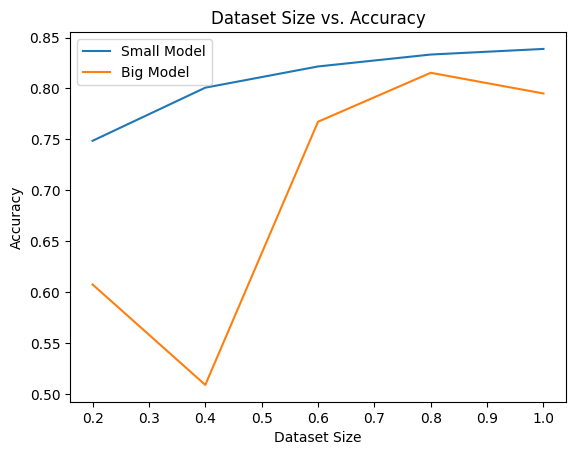

In [7]:
# TODO: Fill in the code cell according to the pytorch tutorial we gave.
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
def train(dataloader, model, loss_fn, optimizer):
    num_batches = len(dataloader)
    size = len(dataloader.dataset)
    epoch_loss = 0
    correct = 0

    model.train()

    for X, y in tqdm(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        pred = pred.argmax(dim=1, keepdim=True)
        correct += pred.eq(y.view_as(pred)).sum().item()

    avg_epoch_loss = epoch_loss / num_batches
    avg_acc = correct / size

    return avg_epoch_loss, avg_acc
def test(dataloader, model, loss_fn):
    num_batches = len(dataloader)
    size = len(dataloader.dataset)
    epoch_loss = 0
    correct = 0

    model.eval()

    with torch.no_grad():
        for X, y in tqdm(dataloader):
            X, y = X.to(device), y.to(device)

            pred = model(X)

            epoch_loss += loss_fn(pred, y).item()
            pred = pred.argmax(dim=1, keepdim=True)
            correct += pred.eq(y.view_as(pred)).sum().item()

    avg_epoch_loss = epoch_loss / num_batches
    avg_acc = correct / size

    return avg_epoch_loss, avg_acc
sampler_2 = RandomSampler(train_dataset, num_samples=int(len(train_dataset) * 0.2))
sampler_4 = RandomSampler(train_dataset, num_samples=int(len(train_dataset) * 0.4))
sampler_6 = RandomSampler(train_dataset, num_samples=int(len(train_dataset) * 0.6))
sampler_8 = RandomSampler(train_dataset, num_samples=int(len(train_dataset) * 0.8))
dataloader_2 = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler_2)
dataloader_4 = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler_4)
dataloader_6 = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler_6)
dataloader_8 = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler_8)

epochs = 50
test_acc_small = []
test_acc_big = []

model_small = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', weights=None)
model_small.fc=nn.Linear(in_features=512,out_features=10,bias=True)
model_small=model_small.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_small.parameters(), lr=1e-3)
for epoch in range(epochs):
    train_loss, train_acc = train(dataloader_2, model_small, loss_fn, optimizer)
    test_loss, test_acc = test(valid_dataloader, model_small, loss_fn)
    print(f"Epoch {epoch + 1:2d}: Loss = {train_loss:.4f} Acc = {train_acc:.2f} Test_Loss = {test_loss:.4f} Test_Acc = {test_acc:.2f}")
test_acc_small.append(test_acc)

model_small = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', weights=None)
model_small.fc=nn.Linear(in_features=512,out_features=10,bias=True)
model_small=model_small.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_small.parameters(), lr=1e-3)
for epoch in range(epochs):
    train_loss, train_acc = train(dataloader_4, model_small, loss_fn, optimizer)
    test_loss, test_acc = test(valid_dataloader, model_small, loss_fn)
    print(f"Epoch {epoch + 1:2d}: Loss = {train_loss:.4f} Acc = {train_acc:.2f} Test_Loss = {test_loss:.4f} Test_Acc = {test_acc:.2f}")
test_acc_small.append(test_acc)

model_small = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', weights=None)
model_small.fc=nn.Linear(in_features=512,out_features=10,bias=True)
model_small=model_small.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_small.parameters(), lr=1e-3)
for epoch in range(epochs):
    train_loss, train_acc = train(dataloader_6, model_small, loss_fn, optimizer)
    test_loss, test_acc = test(valid_dataloader, model_small, loss_fn)
    print(f"Epoch {epoch + 1:2d}: Loss = {train_loss:.4f} Acc = {train_acc:.2f} Test_Loss = {test_loss:.4f} Test_Acc = {test_acc:.2f}")
test_acc_small.append(test_acc)

model_small = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', weights=None)
model_small.fc=nn.Linear(in_features=512,out_features=10,bias=True)
model_small=model_small.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_small.parameters(), lr=1e-3)
for epoch in range(epochs):
    train_loss, train_acc = train(dataloader_8, model_small, loss_fn, optimizer)
    test_loss, test_acc = test(valid_dataloader, model_small, loss_fn)
    print(f"Epoch {epoch + 1:2d}: Loss = {train_loss:.4f} Acc = {train_acc:.2f} Test_Loss = {test_loss:.4f} Test_Acc = {test_acc:.2f}")
test_acc_small.append(test_acc)

model_small = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', weights=None)
model_small.fc=nn.Linear(in_features=512,out_features=10,bias=True)
model_small=model_small.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_small.parameters(), lr=1e-3)
for epoch in range(epochs):
    train_loss, train_acc = train(train_dataloader, model_small, loss_fn, optimizer)
    test_loss, test_acc = test(valid_dataloader, model_small, loss_fn)
    print(f"Epoch {epoch + 1:2d}: Loss = {train_loss:.4f} Acc = {train_acc:.2f} Test_Loss = {test_loss:.4f} Test_Acc = {test_acc:.2f}")
test_acc_small.append(test_acc)

model_big = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', weights=None)
model_big.fc=nn.Linear(in_features=2048,out_features=10,bias=True)
model_big=model_big.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_big.parameters(), lr=1e-3)
for epoch in range(epochs):
    train_loss, train_acc = train(dataloader_2, model_big, loss_fn, optimizer)
    test_loss, test_acc = test(valid_dataloader, model_big, loss_fn)
    print(f"Epoch {epoch + 1:2d}: Loss = {train_loss:.4f} Acc = {train_acc:.2f} Test_Loss = {test_loss:.4f} Test_Acc = {test_acc:.2f}")
test_acc_big.append(test_acc)

model_big = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', weights=None)
model_big.fc=nn.Linear(in_features=2048,out_features=10,bias=True)
model_big=model_big.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_big.parameters(), lr=1e-3)
for epoch in range(epochs):
    train_loss, train_acc = train(dataloader_4, model_big, loss_fn, optimizer)
    test_loss, test_acc = test(valid_dataloader, model_big, loss_fn)
    print(f"Epoch {epoch + 1:2d}: Loss = {train_loss:.4f} Acc = {train_acc:.2f} Test_Loss = {test_loss:.4f} Test_Acc = {test_acc:.2f}")
test_acc_big.append(test_acc)

model_big = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', weights=None)
model_big.fc=nn.Linear(in_features=2048,out_features=10,bias=True)
model_big=model_big.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_big.parameters(), lr=1e-3)
for epoch in range(epochs):
    train_loss, train_acc = train(dataloader_6, model_big, loss_fn, optimizer)
    test_loss, test_acc = test(valid_dataloader, model_big, loss_fn)
    print(f"Epoch {epoch + 1:2d}: Loss = {train_loss:.4f} Acc = {train_acc:.2f} Test_Loss = {test_loss:.4f} Test_Acc = {test_acc:.2f}")
test_acc_big.append(test_acc)

model_big = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', weights=None)
model_big.fc=nn.Linear(in_features=2048,out_features=10,bias=True)
model_big=model_big.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_big.parameters(), lr=1e-3)
for epoch in range(epochs):
    train_loss, train_acc = train(dataloader_8, model_big, loss_fn, optimizer)
    test_loss, test_acc = test(valid_dataloader, model_big, loss_fn)
    print(f"Epoch {epoch + 1:2d}: Loss = {train_loss:.4f} Acc = {train_acc:.2f} Test_Loss = {test_loss:.4f} Test_Acc = {test_acc:.2f}")
test_acc_big.append(test_acc)

model_big = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', weights=None)
model_big.fc=nn.Linear(in_features=2048,out_features=10,bias=True)
model_big=model_big.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_big.parameters(), lr=1e-3)
for epoch in range(epochs):
    train_loss, train_acc = train(train_dataloader, model_big, loss_fn, optimizer)
    test_loss, test_acc = test(valid_dataloader, model_big, loss_fn)
    print(f"Epoch {epoch + 1:2d}: Loss = {train_loss:.4f} Acc = {train_acc:.2f} Test_Loss = {test_loss:.4f} Test_Acc = {test_acc:.2f}")
test_acc_big.append(test_acc)

dataset_size = [0.2, 0.4, 0.6, 0.8, 1.0]
plt.plot(dataset_size,test_acc_small, label='Small Model')
plt.plot(dataset_size,test_acc_big, label = 'Big Model')
plt.title('Dataset Size vs. Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Dataset Size')
plt.legend()
plt.show()

## Codes for Problem 3

In [8]:
# TODO: Try to achieve the best performance given all training data using whatever model and training strategy.
# (New) (You cannot use the model that was pretrained on CIFAR10)

## Problems

1. (30%) Finish the rest of the codes for Problem 1 and Problem 2 according to the hint. (2 code cells in total.)
2. Train small model (resnet18) and big model (resnet50) from scratch on `sixteenth_train_dataloader`, `half_train_dataloader`, and `train_dataloader` respectively.
3. (30%) Achieve the best performance given all training data using whatever model and training strategy.  
  (You cannot use the model that was pretrained on CIFAR10)



## Discussion

Write down your insights in the report. The file name should be report.pdf.
For the following discussion, please present the results graphically as shown in Fig. 1 and discuss them.

- (30%) The relationship between the accuracy, model size, and the training dataset size.  
    (Total 6 models. Small model trains on the sixteenth, half, and all data. Big model trains on the sixteenth, half, and all data. If the result is different from Fig.1, please explain the possible reasons.)
- (10%) What if we train the ResNet with ImageNet initialized weights (`weights="IMAGENET1K_V1"`).
Please explain why the relationship changed this way?

Hint: You can try different hyperparameters combinations when training the models.

## Credits

1. [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html)